In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#mit command option shift p und open active bekommt man seperate window

# Load Data

In [2]:
df=pd.read_csv("relationship_advise_comments_21.csv",sep=";",index_col=[0])

/Users/anthonyfernando/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,2,12,13,14,17,18,19,25,27,29,32,34,35,36,51) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# General EDA

In [3]:
df.head()

,all_awardings,archived,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_template_id,author_flair_text,author_flair_text_color,...,total_awards_received,treatment_tags,unrepliable_reason,author_flair_richtext,author_flair_type,author_fullname,author_patreon_flair,author_premium,author_cakeday,editable
0,[],False,NaN,[deleted],NaN,NaN,NaN,NaN,NaN,dark,...,0.0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,NaN,SpacedSpencer,1.476050e+09,NaN,NaN,NaN,NaN,NaN,...,0.0,[],NaN,[],text,t2_1206yt,False,False,NaN,NaN
2,[],False,NaN,NatsumiEla,1.579808e+09,NaN,NaN,NaN,NaN,NaN,...,0.0,[],NaN,[],text,t2_57x5hg1w,False,False,NaN,NaN
3,[],False,NaN,bunnydudebro,1.611786e+09,NaN,NaN,NaN,NaN,NaN,...,0.0,[],NaN,[],text,t2_a0xpbgu5,False,False,NaN,NaN
4,[],False,NaN,Numerous-Rice-661,1.595732e+09,NaN,NaN,NaN,NaN,NaN,...,0.0,[],NaN,[],text,t2_5lgqjo1z,False,False,NaN,NaN


In [4]:
# Annahme: Dein DataFrame heißt df
anzahl_removed = df['body'].value_counts().get('[removed]', 0)

print(f"Anzahl der Zeilen mit '[removed]' in der Spalte 'body': {anzahl_removed}")

Anzahl der Zeilen mit '[removed]' in der Spalte 'body': 19458


In [123]:
df.tail()

,all_awardings,archived,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_template_id,author_flair_text,author_flair_text_color,...,total_awards_received,treatment_tags,unrepliable_reason,author_flair_richtext,author_flair_type,author_fullname,author_patreon_flair,author_premium,author_cakeday,editable
865336,[],False,NaN,Fragrant-Attitude-42,1.610567e+09,NaN,NaN,NaN,NaN,NaN,...,0.0,[],NaN,[],text,t2_9t0r4zz9,False,False,NaN,NaN
865337,[],False,NaN,tymacpherson,1.593992e+09,NaN,NaN,NaN,NaN,NaN,...,0.0,[],NaN,[],text,t2_6o7uvc5n,False,False,NaN,NaN
865338,[],False,NaN,khaine0304,1.518827e+09,NaN,NaN,NaN,NaN,NaN,...,0.0,[],NaN,[],text,t2_xeooe5f,False,False,NaN,NaN
865339,[],False,NaN,sammikay95,1.476940e+09,NaN,NaN,NaN,NaN,NaN,...,0.0,[],NaN,[],text,t2_1295b6,False,False,NaN,NaN
865340,[],False,NaN,crimebuster123494949,1.602773e+09,NaN,NaN,NaN,NaN,NaN,...,0.0,[],NaN,[],text,t2_8hn1lhlf,False,False,NaN,NaN


In [124]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 865345 entries, 0 to 865340
Data columns (total 51 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   all_awardings                    865344 non-null  object 
 1   archived                         865344 non-null  object 
 2   associated_award                 0 non-null       float64
 3   author                           865341 non-null  object 
 4   author_created_utc               760543 non-null  float64
 5   author_flair_background_color    0 non-null       float64
 6   author_flair_css_class           3 non-null       float64
 7   author_flair_template_id         26847 non-null   object 
 8   author_flair_text                27005 non-null   object 
 9   author_flair_text_color          129059 non-null  object 
 10  body                             865341 non-null  object 
 11  can_gild                         865341 non-null  object 
 12  collaps

In [6]:
df.isnull().sum() 

all_awardings                           1
archived                                1
associated_award                   865345
author                                  4
author_created_utc                 104802
author_flair_background_color      865345
author_flair_css_class             865342
author_flair_template_id           838498
author_flair_text                  838340
author_flair_text_color            736286
body                                    4
can_gild                                4
collapsed                               4
collapsed_because_crowd_control    865342
collapsed_reason                   846922
collapsed_reason_code              773884
comment_type                       865342
controversiality                        4
created_utc                             4
distinguished                      801587
edited                                  4
gilded                                  4
gildings                                4
id                                

In [125]:
df.describe()

,associated_award,author_created_utc,author_flair_background_color,author_flair_css_class,gilded,score,top_awarded_type,total_awards_received,unrepliable_reason
count,0.0,7.605430e+05,0.0,3.0,865341.000000,865338.000000,0.0,865338.000000,0.0
mean,NaN,1.550816e+09,NaN,0.0,0.000349,10.600325,NaN,0.007254,NaN
std,NaN,9.794494e+07,NaN,0.0,0.019643,89.330475,NaN,0.222821,NaN
min,NaN,1.138459e+09,NaN,0.0,0.000000,-1674.000000,NaN,0.000000,NaN
25%,NaN,1.525012e+09,NaN,0.0,0.000000,1.000000,NaN,0.000000,NaN
50%,NaN,1.590907e+09,NaN,0.0,0.000000,1.000000,NaN,0.000000,NaN
75%,NaN,1.620171e+09,NaN,0.0,0.000000,3.000000,NaN,0.000000,NaN
max,NaN,1.638314e+09,NaN,0.0,4.000000,10177.000000,NaN,126.000000,NaN


In [126]:
df.columns

Index(['all_awardings', 'archived', 'associated_award', 'author',
       'author_created_utc', 'author_flair_background_color',
       'author_flair_css_class', 'author_flair_template_id',
       'author_flair_text', 'author_flair_text_color', 'body', 'can_gild',
       'collapsed', 'collapsed_because_crowd_control', 'collapsed_reason',
       'collapsed_reason_code', 'comment_type', 'controversiality',
       'created_utc', 'distinguished', 'edited', 'gilded', 'gildings', 'id',
       'is_submitter', 'link_id', 'locked', 'name', 'no_follow', 'parent_id',
       'permalink', 'retrieved_on', 'score', 'score_hidden', 'send_replies',
       'stickied', 'subreddit', 'subreddit_id', 'subreddit_name_prefixed',
       'subreddit_type', 'top_awarded_type', 'total_awards_received',
       'treatment_tags', 'unrepliable_reason', 'author_flair_richtext',
       'author_flair_type', 'author_fullname', 'author_patreon_flair',
       'author_premium', 'author_cakeday', 'editable'],
      dtype='obje

# One Feature EDA

# Controversialty

0       807889
0        31799
1        24688
1          962
True         3
Name: controversiality, dtype: int64


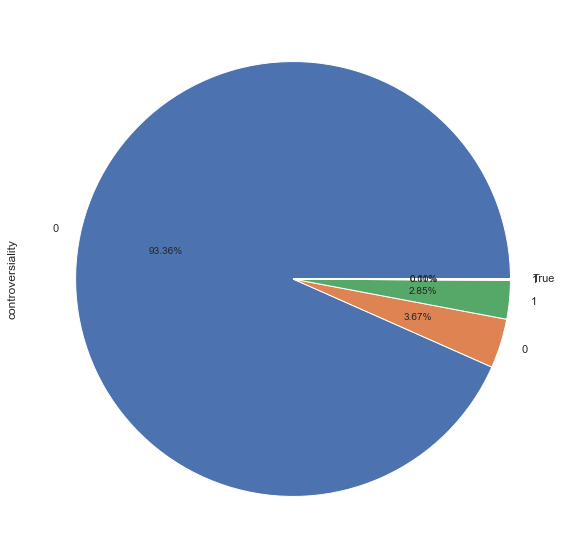

In [127]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["controversiality"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["controversiality"].value_counts())

In [128]:
# Werte '0' in 0 umwandeln
df['controversiality'] = df['controversiality'].replace(0,'0')

# Werte '1' in 1 umwandeln
df['controversiality'] = df['controversiality'].replace(1,'1')
df['controversiality'] = df['controversiality'].replace("True",'1')

In [129]:
df["controversiality"].unique()

array(['0', '1', nan], dtype=object)

In [130]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Entferne alle Zeilen, in denen NaN-Werte in der Spalte "controversiality" vorkommen
df = df.dropna(subset=['controversiality'])

# Jetzt enthält 'df' den DataFrame ohne die Zeilen, in denen NaN-Werte in "controversiality" vorkommen


In [131]:
df["controversiality"].unique()

array(['0', '1'], dtype=object)

0    839688
1     25653
Name: controversiality, dtype: int64


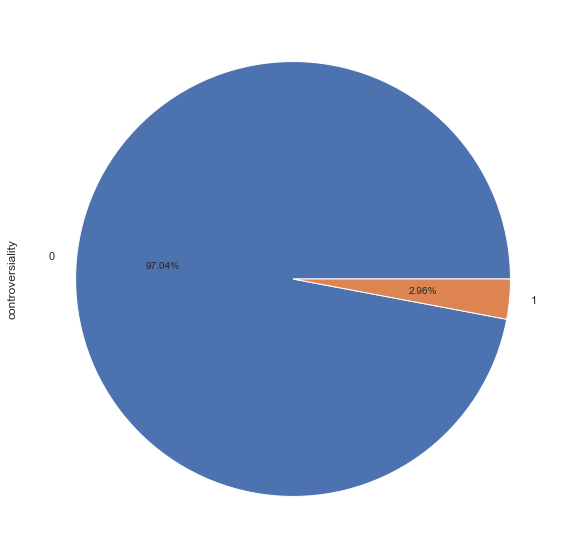

In [132]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["controversiality"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["controversiality"].value_counts())

In [133]:
df[df['controversiality'].isna()]

,all_awardings,archived,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_template_id,author_flair_text,author_flair_text_color,...,total_awards_received,treatment_tags,unrepliable_reason,author_flair_richtext,author_flair_type,author_fullname,author_patreon_flair,author_premium,author_cakeday,editable


# Stickied

False          829277
False           32539
True             3300
True              222
t2_2yd95ifr         2
t2_53iz15hd         1
Name: stickied, dtype: int64


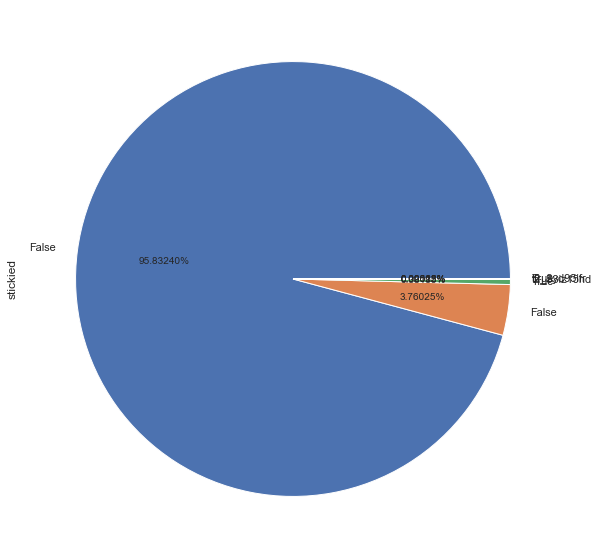

In [134]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["stickied"].value_counts().plot(kind='pie', autopct='%1.5f%%')
print(df["stickied"].value_counts())

In [135]:
df["stickied"].unique()

array([False, True, 'False', 'True', 't2_2yd95ifr', 't2_53iz15hd'],
      dtype=object)

In [136]:
df['stickied'] = df['stickied'].replace(False, "0")
df['stickied'] = df['stickied'].replace(True, "1")
df['stickied'] = df['stickied'].replace("False", "0")
df['stickied'] = df['stickied'].replace("True", "1")

In [137]:
df["stickied"].unique()

array(['0', '1', 't2_2yd95ifr', 't2_53iz15hd'], dtype=object)

In [138]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Extrahiere alle Zeilen, in denen die Spalte "stickied" die angegebenen Werte hat
selected_rows = df[df['stickied'].isin(['t2_2yd95ifr', 't2_53iz15hd'])]

# Jetzt enthält 'selected_rows' alle Zeilen, in denen die Spalte "stickied" die angegebenen Werte hat
selected_rows[["body","created_utc"]]

,body,created_utc
"No, she never mentions it. She only mentioned a little information about him once and never again. She knows it wouldn't be good for the relationship.",0,t1_hk3hy95
"You're right, . Thank you very much!",0,t1_hk3ivgq
", Telling everybody that that guy is doing well for himself, stay living in the hood though. I'm sure that hoodie covers a multitude of sins right? Yet you still got the jokes though if only jokes would cover my sins, wink wink anyways gotta drive off now before you catch me sinning",0,t3_r3rv8o


In [139]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Identifiziere die Zeilen, in denen die Spalte "stickied" die angegebenen Werte hat
rows_to_remove = df[df['stickied'].isin(['t2_2yd95ifr', 't2_53iz15hd'])]

# Lösche die ausgewählten Zeilen aus dem DataFrame df
df = df.drop(rows_to_remove.index)

# Jetzt enthält 'df' den DataFrame ohne die Zeilen, in denen die Spalte "stickied" die angegebenen Werte hat


In [140]:
df["stickied"].unique()

array(['0', '1'], dtype=object)

0    861816
1      3522
Name: stickied, dtype: int64


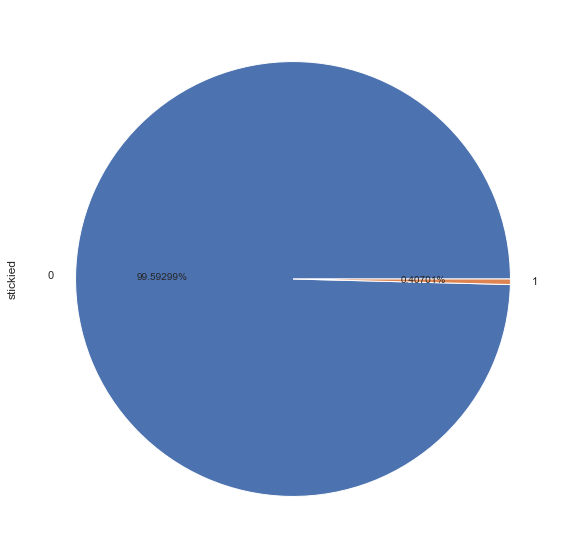

In [141]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["stickied"].value_counts().plot(kind='pie', autopct='%1.5f%%')
print(df["stickied"].value_counts())

# Link_id

t3_r172n7    1331
t3_qmkx9x    1231
t3_r150dl    1116
t3_qr0iad    1059
t3_qy94fj    1056
             ... 
t3_qs9fgt       1
t3_r1izx8       1
t3_qs9efe       1
t3_qs9dsx       1
t3_r615cp       1
Name: link_id, Length: 64469, dtype: int64


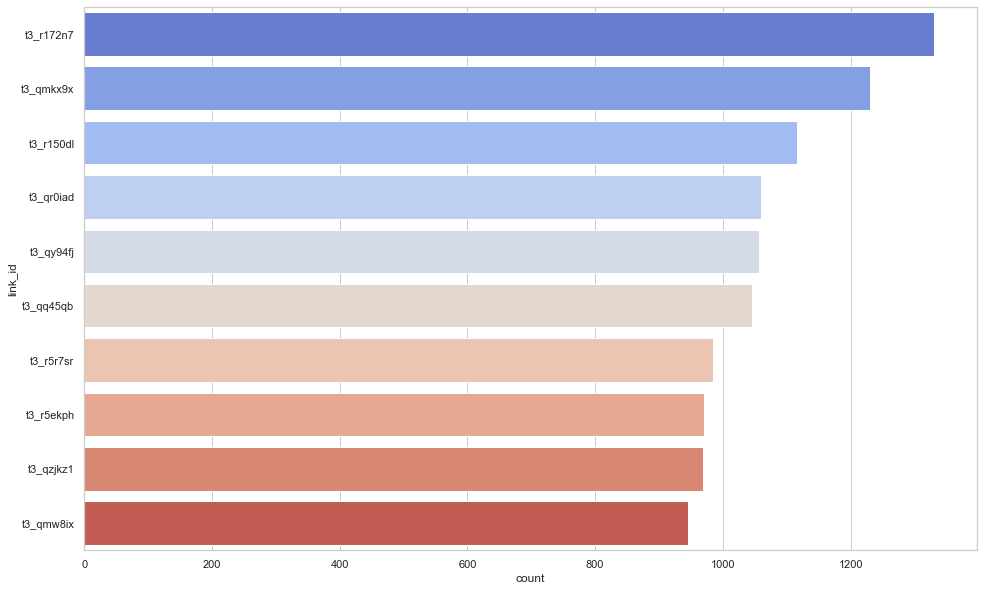

In [142]:
fig = plt.figure(figsize=(16,10))
sns.countplot(y="link_id", data=df, palette="coolwarm",
              order=df.link_id.value_counts().iloc[:10].index)
print(df["link_id"].value_counts())

In [143]:
df[df['link_id'].isna()]

,all_awardings,archived,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_template_id,author_flair_text,author_flair_text_color,...,total_awards_received,treatment_tags,unrepliable_reason,author_flair_richtext,author_flair_type,author_fullname,author_patreon_flair,author_premium,author_cakeday,editable


# Subreddit_id

t5_2r0cn    865338
Name: subreddit_id, dtype: int64


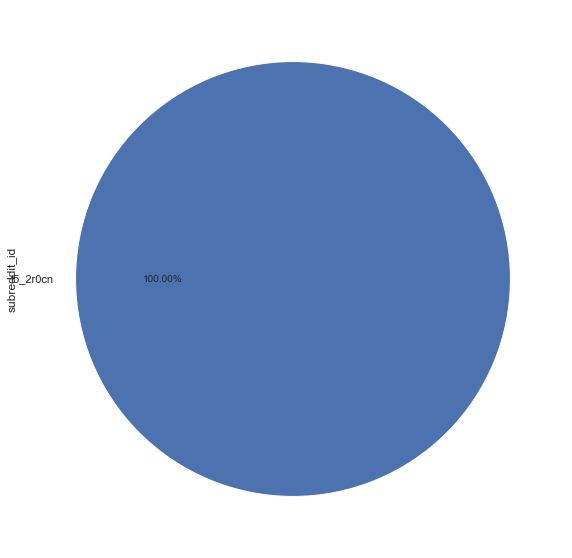

In [144]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["subreddit_id"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["subreddit_id"].value_counts()) 

In [145]:
df[df['subreddit_id'].isna()]

,all_awardings,archived,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_template_id,author_flair_text,author_flair_text_color,...,total_awards_received,treatment_tags,unrepliable_reason,author_flair_richtext,author_flair_type,author_fullname,author_patreon_flair,author_premium,author_cakeday,editable


# Author

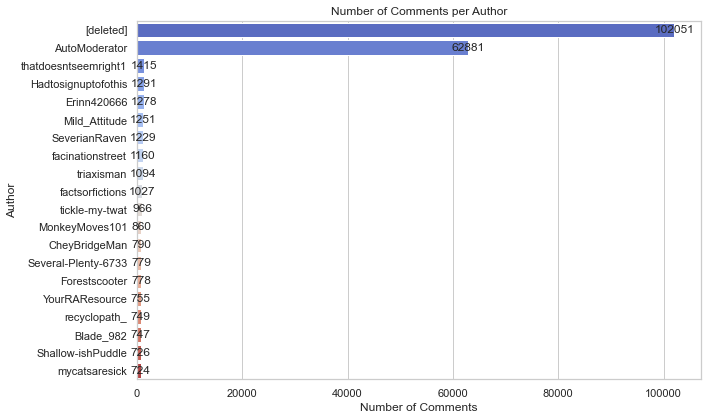

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits comments_new DataFrame mit einer "author" Spalte

# Top 5 Autoren nach Anzahl der Kommentare auswählen
top_authors = df['author'].value_counts().iloc[:20].index

# Sub-Datenframe nur mit den Top-Autoren erstellen
top_comments = df[df['author'].isin(top_authors)]

# Countplot erstellen
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plot = sns.countplot(y="author", data=top_comments, palette="coolwarm", order=top_authors)

# Anzahl der Kommentare über den Balken anzeigen
for p in plot.patches:
    plot.annotate(format(p.get_width(), '.0f'),
                  (p.get_width() + 10, p.get_y() + p.get_height() / 2),
                  ha = 'center', va = 'center')

plt.xlabel("Number of Comments")
plt.ylabel("Author")
plt.title("Number of Comments per Author")

# Achsenbeschriftungen nicht abschneiden
plt.tight_layout()
#automoderator löschen

In [147]:
 df[df['author'].str.contains('AutoModerator')]

,all_awardings,archived,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_template_id,author_flair_text,author_flair_text_color,...,total_awards_received,treatment_tags,unrepliable_reason,author_flair_richtext,author_flair_type,author_fullname,author_patreon_flair,author_premium,author_cakeday,editable
6,[],False,NaN,AutoModerator,1.325741e+09,NaN,NaN,NaN,NaN,NaN,...,0.0,[],NaN,[],text,t2_6l4z3,False,True,NaN,NaN
12,[],False,NaN,AutoModerator,1.325741e+09,NaN,NaN,NaN,NaN,NaN,...,0.0,[],NaN,[],text,t2_6l4z3,False,True,NaN,NaN
29,[],False,NaN,AutoModerator,1.325741e+09,NaN,NaN,NaN,NaN,NaN,...,0.0,[],NaN,[],text,t2_6l4z3,False,True,NaN,NaN
30,[],False,NaN,AutoModerator,1.325741e+09,NaN,NaN,NaN,NaN,NaN,...,0.0,[],NaN,[],text,t2_6l4z3,False,True,NaN,NaN
32,[],False,NaN,AutoModerator,1.325741e+09,NaN,NaN,NaN,NaN,NaN,...,0.0,[],NaN,[],text,t2_6l4z3,False,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865293,[],False,NaN,AutoModerator,1.325741e+09,NaN,NaN,NaN,NaN,NaN,...,0.0,[],NaN,[],text,t2_6l4z3,False,True,NaN,NaN
865310,[],False,NaN,AutoModerator,1.325741e+09,NaN,NaN,NaN,NaN,NaN,...,0.0,[],NaN,[],text,t2_6l4z3,False,True,NaN,NaN
865324,[],False,NaN,AutoModerator,1.325741e+09,NaN,NaN,NaN,NaN,NaN,...,0.0,[],NaN,[],text,t2_6l4z3,False,True,NaN,NaN
865326,[],False,NaN,AutoModerator,1.325741e+09,NaN,NaN,NaN,NaN,NaN,...,0.0,[],NaN,[],text,t2_6l4z3,False,True,NaN,NaN


In [148]:
df = df[df['author'] != 'AutoModerator']

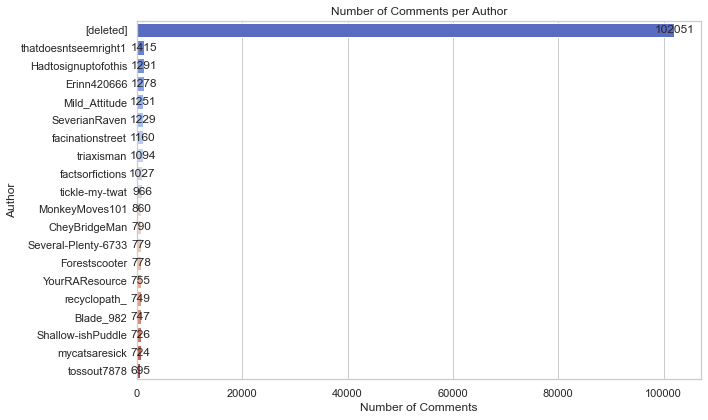

In [149]:

# Top 5 Autoren nach Anzahl der Kommentare auswählen
top_authors = df['author'].value_counts().iloc[:20].index

# Sub-Datenframe nur mit den Top-Autoren erstellen
top_comments = df[df['author'].isin(top_authors)]

# Countplot erstellen
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plot = sns.countplot(y="author", data=top_comments, palette="coolwarm", order=top_authors)

# Anzahl der Kommentare über den Balken anzeigen
for p in plot.patches:
    plot.annotate(format(p.get_width(), '.0f'),
                  (p.get_width() + 10, p.get_y() + p.get_height() / 2),
                  ha = 'center', va = 'center')

plt.xlabel("Number of Comments")
plt.ylabel("Author")
plt.title("Number of Comments per Author")

# Achsenbeschriftungen nicht abschneiden
plt.tight_layout()
#automoderator löschen

# Author flair text

In [150]:
df['author_flair_text'].fillna('0', inplace=True)

0                            775452
Late 20s Female                3564
Early 20s Female               3360
Early 30s Female               3010
40s Male                       2731
Late 30s Male                  2069
Early 30s Male                 1841
Late 20s Male                  1780
Late 30s Female                1455
Early 20s Male                 1316
Late 30s                        850
40s Female                      844
Late 20s                        822
50s Male                        726
Teens Female                    487
Teens Male                      423
Early 30s                       370
Early 20s                       330
50s                             249
60+ Male                        191
40s                             167
Verified Crisis Counselor       141
50s Female                      114
Teens                           109
Press Inquiries                  39
60+ Female                       10
60+                               5
Squire                      

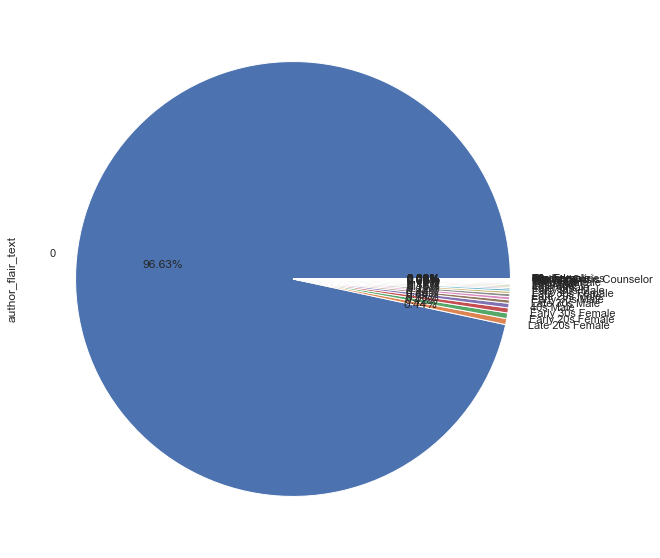

In [151]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["author_flair_text"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["author_flair_text"].value_counts()) 

# Subreddit

relationship_advice    802457
Name: subreddit, dtype: int64


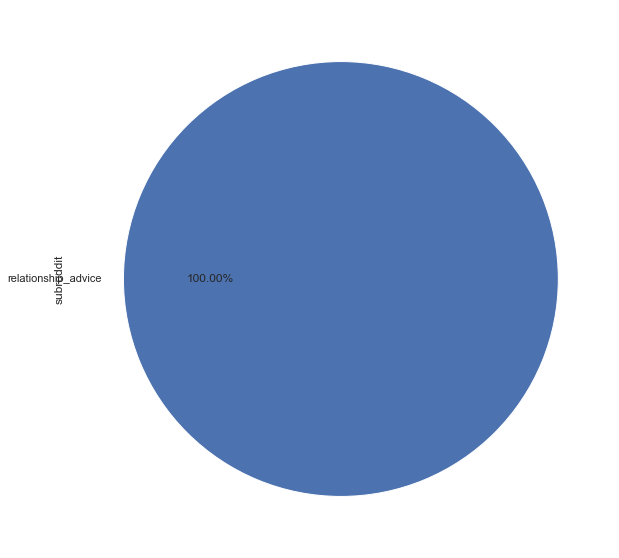

In [152]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["subreddit"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["subreddit"].value_counts())

In [153]:
df[df['subreddit'].isna()]

,all_awardings,archived,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_template_id,author_flair_text,author_flair_text_color,...,total_awards_received,treatment_tags,unrepliable_reason,author_flair_richtext,author_flair_type,author_fullname,author_patreon_flair,author_premium,author_cakeday,editable


# Created_utc

In [154]:
df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')

In [155]:
df['created_utc']

0        2021-11-01 00:00:01
1        2021-11-01 00:00:04
2        2021-11-01 00:00:05
3        2021-11-01 00:00:10
4        2021-11-01 00:00:11
                 ...        
865336   2021-11-30 23:59:46
865337   2021-11-30 23:59:47
865338   2021-11-30 23:59:51
865339   2021-11-30 23:59:52
865340   2021-11-30 23:59:55
Name: created_utc, Length: 802457, dtype: datetime64[ns]

In [156]:
df[df['created_utc'].isna()]

,all_awardings,archived,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_template_id,author_flair_text,author_flair_text_color,...,total_awards_received,treatment_tags,unrepliable_reason,author_flair_richtext,author_flair_type,author_fullname,author_patreon_flair,author_premium,author_cakeday,editable


# Hours

Text(0, 0.5, 'Anzahl der Kommentare')

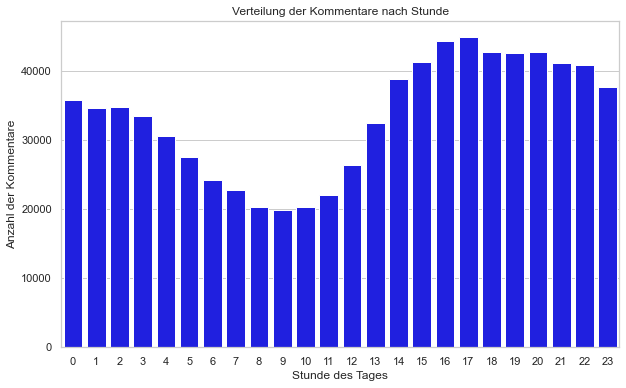

In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits den DataFrame "comments_new" geladen

# Extrahiere die Stunden aus der Spalte "created_utc"
df['created_hour'] = pd.to_datetime(df['created_utc'], unit='s').dt.hour

# Erstelle das Countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='created_hour', color='blue')

plt.title('Verteilung der Kommentare nach Stunde')
plt.xlabel('Stunde des Tages')
plt.ylabel('Anzahl der Kommentare')

# Days

Text(0, 0.5, 'Anzahl der Kommentare')

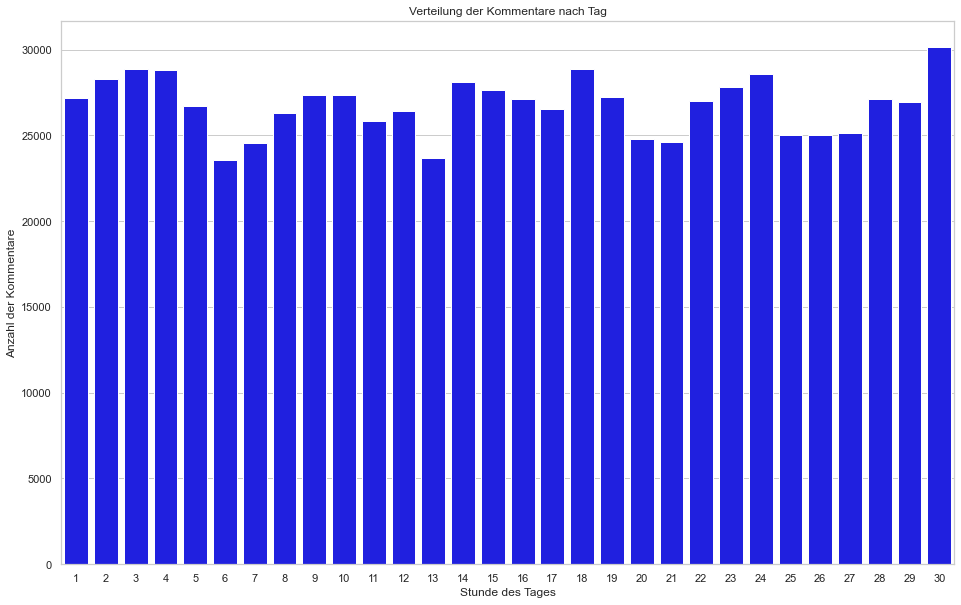

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits den DataFrame "comments_new" geladen

# Extrahiere die Stunden aus der Spalte "created_utc"
df['created_day'] = pd.to_datetime(df['created_utc'], unit='s').dt.day

# Erstelle das Countplot
fig = plt.figure(figsize=(16,10))
sns.countplot(data=df, x='created_day', color='blue')

plt.title('Verteilung der Kommentare nach Tag')
plt.xlabel('Stunde des Tages')
plt.ylabel('Anzahl der Kommentare')

In [159]:
df['created_year'] = pd.to_datetime(df['created_utc'], unit='s').dt.year

In [160]:
df['created_year'].unique()

array([2021])

# Gilded

0.0    802171
1.0       276
2.0         9
4.0         1
Name: gilded, dtype: int64


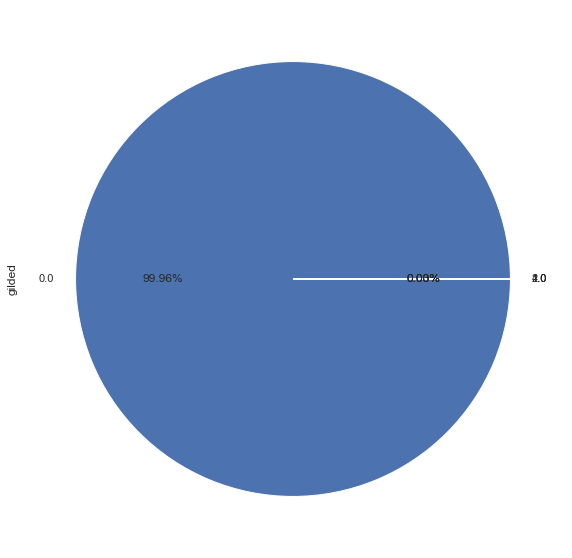

In [161]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["gilded"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["gilded"].value_counts())

In [162]:
df["gilded"] = df["gilded"].replace(0,"0")
df["gilded"] = df["gilded"].replace(1, "1")
df["gilded"] = df["gilded"].replace(2, "2")
df["gilded"] = df["gilded"].replace(4, "4")

0    802171
1       276
2         9
4         1
Name: gilded, dtype: int64


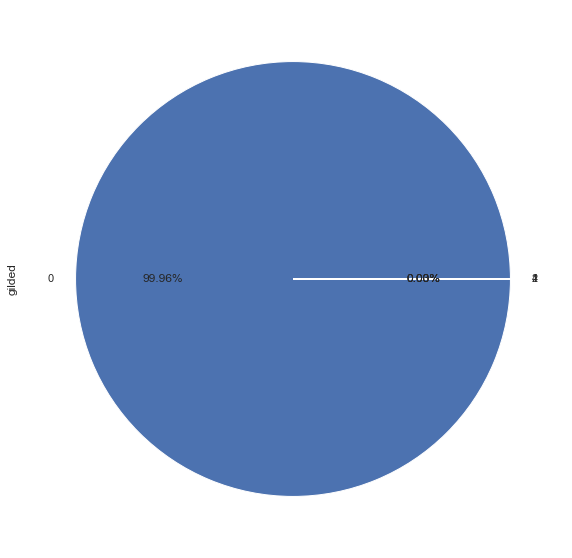

In [163]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["gilded"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["gilded"].value_counts())

In [164]:
df["gilded"].unique()

array(['0', '2', '1', '4'], dtype=object)

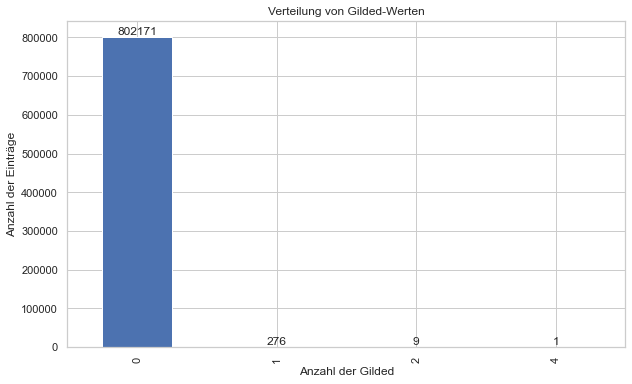

In [165]:
fig = plt.figure(figsize=(10, 6))
ax = df["gilded"].value_counts().plot(kind='bar')

# Optional: Beschriftungen und Titel hinzufügen
ax.set_xlabel('Anzahl der Gilded')
ax.set_ylabel('Anzahl der Einträge')
ax.set_title('Verteilung von Gilded-Werten')

# Anzahl der Werte über den Balken anzeigen
for i, v in enumerate(df["gilded"].value_counts()):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Distinguisshed

In [166]:
df['distinguished'].fillna('0', inplace=True)

0            801577
moderator       880
Name: distinguished, dtype: int64


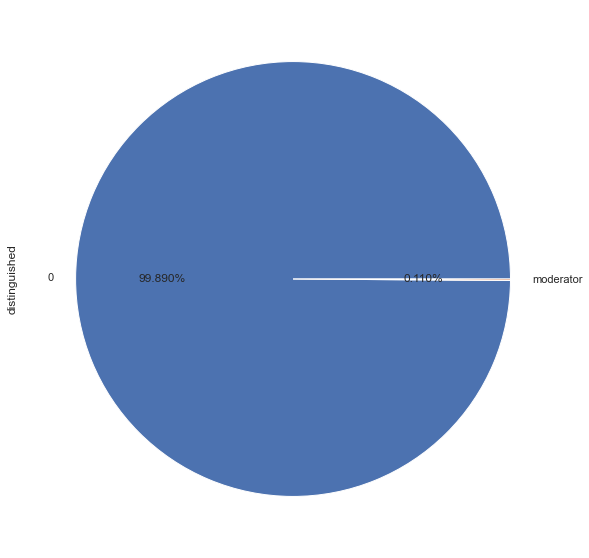

In [167]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["distinguished"].value_counts().plot(kind='pie', autopct='%1.3f%%')
print(df["distinguished"].value_counts())

In [168]:
df["distinguished"].unique()

array(['0', 'moderator'], dtype=object)

In [169]:
 df[df['distinguished'].str.contains('moderator')]

,all_awardings,archived,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_template_id,author_flair_text,author_flair_text_color,...,author_flair_richtext,author_flair_type,author_fullname,author_patreon_flair,author_premium,author_cakeday,editable,created_hour,created_day,created_year
292,[],False,NaN,R_Amods,1.568494e+09,NaN,NaN,NaN,0,NaN,...,[],text,t2_4l7jlp7a,False,False,NaN,NaN,0,1,2021
1365,[],False,NaN,R_Amods,1.568494e+09,NaN,NaN,NaN,0,NaN,...,[],text,t2_4l7jlp7a,False,False,NaN,NaN,1,1,2021
3601,[],False,NaN,Sunkisty,1.461268e+09,NaN,NaN,NaN,0,NaN,...,[],text,t2_xcql2,False,False,NaN,NaN,3,1,2021
3610,[],False,NaN,Sunkisty,1.461268e+09,NaN,NaN,NaN,0,NaN,...,[],text,t2_xcql2,False,False,NaN,NaN,3,1,2021
3630,[],False,NaN,Sunkisty,1.461268e+09,NaN,NaN,NaN,0,NaN,...,[],text,t2_xcql2,False,False,NaN,NaN,3,1,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863133,"[{'award_sub_type': 'GLOBAL', 'award_type': 'g...",False,NaN,R_Amods,1.568494e+09,NaN,NaN,NaN,0,NaN,...,[],text,t2_4l7jlp7a,False,False,NaN,NaN,22,30,2021
863795,[],False,NaN,budlejari,1.441883e+09,NaN,NaN,NaN,0,NaN,...,[],text,t2_qbwqq,False,False,NaN,NaN,22,30,2021
864071,[],False,NaN,budlejari,1.441883e+09,NaN,NaN,NaN,0,NaN,...,[],text,t2_qbwqq,False,False,NaN,NaN,23,30,2021
864108,[],False,NaN,R_Amods,1.568494e+09,NaN,NaN,NaN,0,NaN,...,[],text,t2_4l7jlp7a,False,False,NaN,NaN,23,30,2021


In [170]:
 df[df['distinguished'].str.contains('moderator')]["body"].iloc[0:20]


292      This post has reached one of our comment/karma...
1365     This post has reached one of our comment/karma...
3601     Hey, /u/DootMuncher. Unfortunately your submis...
3610     Hey, /u/Tejomaya007. Unfortunately your submis...
3630     Hey, /u/thatdude2929. Unfortunately your submi...
3635     Hey, /u/sugaronthefl00r. Unfortunately your su...
5218     This post has reached one of our comment/karma...
5430     This post has reached one of our comment/karma...
5873     You might not *like* these people's comments b...
7400     This post has reached one of our comment/karma...
9321     This post has reached one of our comment/karma...
9610     This post has reached one of our comment/karma...
10454    This post has reached one of our comment/karma...
11795    This post has reached one of our comment/karma...
11945    This post has reached one of our comment/karma...
12732    This post has reached one of our comment/karma...
13286    This post has reached one of our comment/karma.

In [171]:

behalten_indexe = [5873,76147,97324,130019,350782,562842,607912,609886,609961,720933,721747]

# Lösche die Zeilen, die 'distinguished' den Wert 'moderator' haben, aber nicht in der behalten_indexe-Liste enthalten sind
df = df[~((df['distinguished'] == 'moderator') & (~df.index.isin(behalten_indexe)))]

In [172]:
 df[df['distinguished'].str.contains('moderator')]["body"]

5873      You might not *like* these people's comments b...
76147     &gt;I'm free to comment as much as I like on a...
97324     I recognize the legal work has already happene...
130019    &gt; idk I hope you have a good conversation w...
350782                               Hi “Jana”\n\nNice try.
562842    Hun, you need to go put this on Kerry's post, ...
607912    An attempt will be made but there is no assura...
609886                  What are those questions regarding?
609961                 Send away. I will try to answer now.
720933            Raise your hand and we'll do what we can!
721747                                           we hope so
Name: body, dtype: object

0            801577
moderator        11
Name: distinguished, dtype: int64


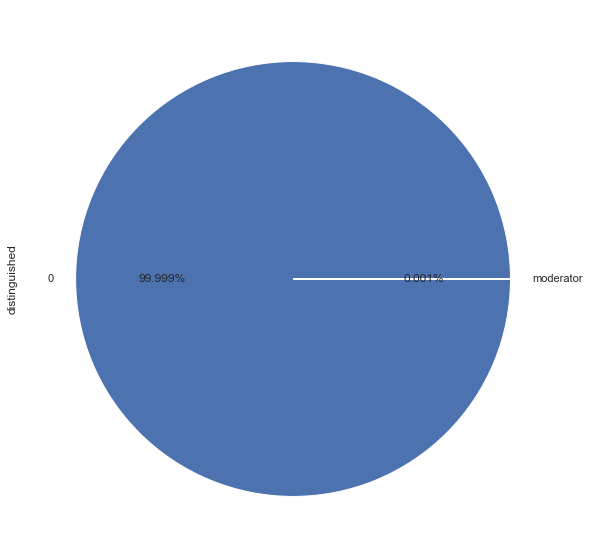

In [173]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["distinguished"].value_counts().plot(kind='pie', autopct='%1.3f%%')
print(df["distinguished"].value_counts())

# Edited

In [174]:
df["edited"].unique()

array(['False', '1635730516.0', '1635725890.0', ..., '1638325269.0',
       '1638316983.0', '1638320759.0'], dtype=object)

In [175]:
# Alle Zahlenwerte in der Spalte "edited" durch "1" ersetzen
df['edited'] = df['edited'].replace(to_replace=r'\d', value='1', regex=True)
df['edited'] = df['edited'].replace('1111111111', "1")
df['edited'] = df['edited'].replace('False', "0")

In [176]:
df["edited"].unique()

array(['0', '1111111111.1'], dtype=object)

In [177]:
df['edited'] = df['edited'].replace('1111111111.1', "1")
df["edited"].unique()

array(['0', '1'], dtype=object)

0    779813
1     21775
Name: edited, dtype: int64


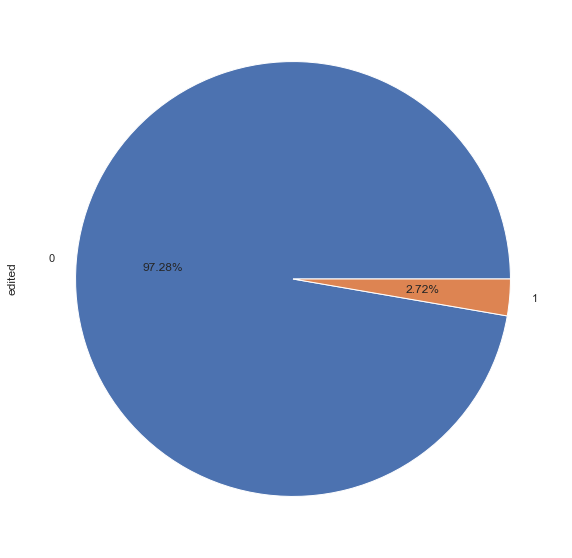

In [178]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df['edited'].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df['edited'].value_counts())

In [179]:
df[df['edited'].isna()]

,all_awardings,archived,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_template_id,author_flair_text,author_flair_text_color,...,author_flair_richtext,author_flair_type,author_fullname,author_patreon_flair,author_premium,author_cakeday,editable,created_hour,created_day,created_year


# Score

In [180]:
df["score"].value_counts()

 1.0       307810
 2.0       135501
 3.0        64151
 0.0        41402
 4.0        26987
            ...  
 2760.0         1
 1351.0         1
 3383.0         1
-458.0          1
 2098.0         1
Name: score, Length: 2198, dtype: int64

In [181]:
df['score'] = df["score"].astype(int)

In [182]:
df["score"].mean()

11.360942279575044

In [183]:
df.describe()

,associated_award,author_created_utc,author_flair_background_color,author_flair_css_class,score,top_awarded_type,total_awards_received,unrepliable_reason,created_hour,created_day,created_year
count,0.0,6.967900e+05,0.0,0.0,801588.000000,0.0,801588.000000,0.0,801588.000000,801588.000000,801588.0
mean,NaN,1.571150e+09,NaN,NaN,11.360942,NaN,0.007809,NaN,12.458188,15.491970,2021.0
std,NaN,7.402208e+07,NaN,NaN,92.761145,NaN,0.231452,NaN,7.186184,8.717909,0.0
min,NaN,1.138459e+09,NaN,NaN,-1674.000000,NaN,0.000000,NaN,0.000000,1.000000,2021.0
25%,NaN,1.549831e+09,NaN,NaN,1.000000,NaN,0.000000,NaN,6.000000,8.000000,2021.0
50%,NaN,1.596345e+09,NaN,NaN,1.000000,NaN,0.000000,NaN,14.000000,16.000000,2021.0
75%,NaN,1.622647e+09,NaN,NaN,3.000000,NaN,0.000000,NaN,19.000000,23.000000,2021.0
max,NaN,1.638314e+09,NaN,NaN,10177.000000,NaN,126.000000,NaN,23.000000,30.000000,2021.0


In [184]:
df.isnull().sum() 

all_awardings                           0
archived                                0
associated_award                   801588
author                                  0
author_created_utc                 104798
author_flair_background_color      801588
author_flair_css_class             801588
author_flair_template_id           774770
author_flair_text                       0
author_flair_text_color            672558
body                                    1
can_gild                                0
collapsed                               0
collapsed_because_crowd_control    801588
collapsed_reason                   783168
collapsed_reason_code              710130
comment_type                       801588
controversiality                        0
created_utc                             0
distinguished                           0
edited                                  0
gilded                                  0
gildings                                0
id                                

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 801588 entries, 0 to 865340
Data columns (total 54 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   all_awardings                    801588 non-null  object        
 1   archived                         801588 non-null  object        
 2   associated_award                 0 non-null       float64       
 3   author                           801588 non-null  object        
 4   author_created_utc               696790 non-null  float64       
 5   author_flair_background_color    0 non-null       float64       
 6   author_flair_css_class           0 non-null       float64       
 7   author_flair_template_id         26818 non-null   object        
 8   author_flair_text                801588 non-null  object        
 9   author_flair_text_color          129030 non-null  object        
 10  body                             801587 non-null 

# Two Feature Analyses

# Score vs hours

<AxesSubplot:xlabel='created_hour', ylabel='score'>

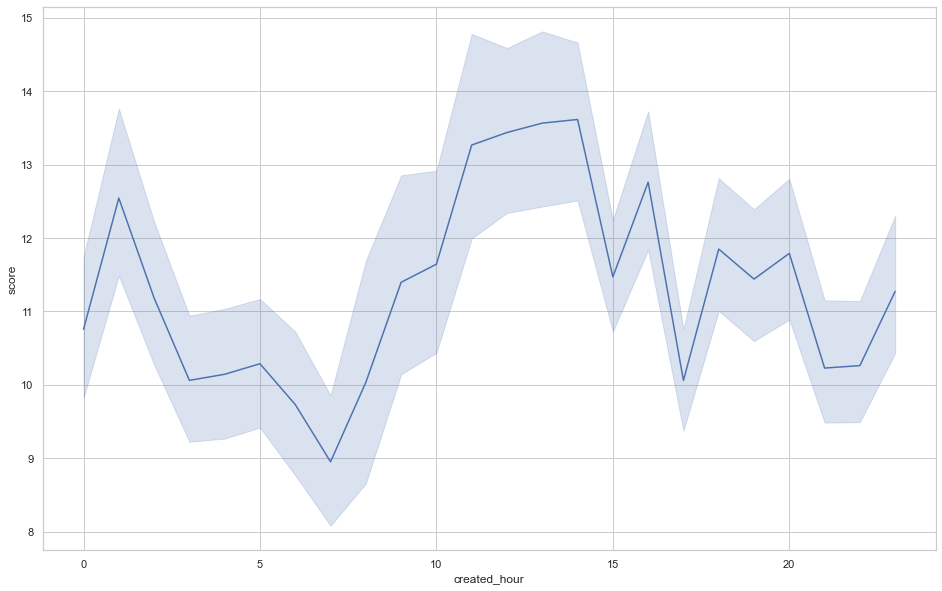

In [186]:
fig = plt.figure(figsize=(16,10))
sns.lineplot(data=df, x="created_hour", y="score")

# Days vs score

<AxesSubplot:xlabel='created_day', ylabel='score'>

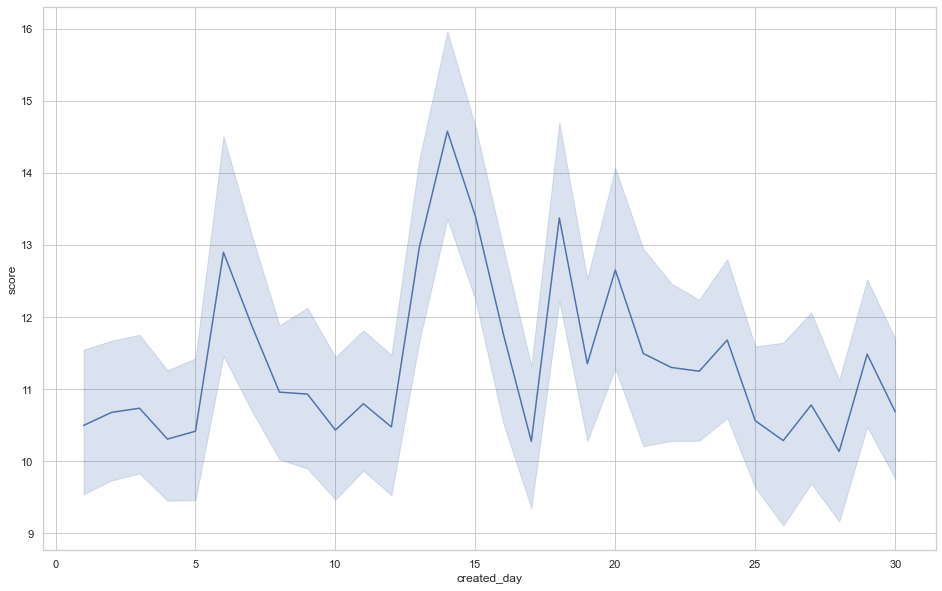

In [187]:
fig = plt.figure(figsize=(16,10))
sns.lineplot(data=df, x="created_day", y="score")

# Which Author have the most scores

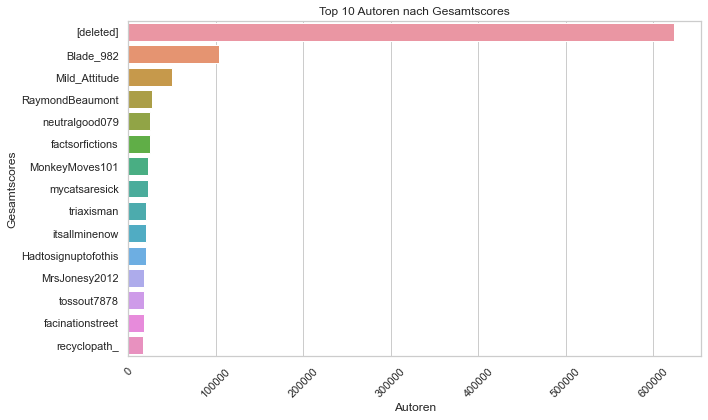

In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: merged_df ist dein DataFrame mit den entsprechenden Spalten

# Autoren nach Gesamtscores gruppieren
author_scores = df.groupby('author')['score'].sum()

# Autoren nach Gesamtscores absteigend sortieren und die Top 10 auswählen
top_authors = author_scores.sort_values(ascending=False).head(15)

# Plot mit Seaborn erstellen
plt.figure(figsize=(10, 6))
sns.barplot(y=top_authors.index, x=top_authors.values)
plt.title('Top 10 Autoren nach Gesamtscores')
plt.xlabel('Autoren')
plt.ylabel('Gesamtscores')
plt.xticks(rotation=45)
plt.tight_layout()

# Ohne Deleted

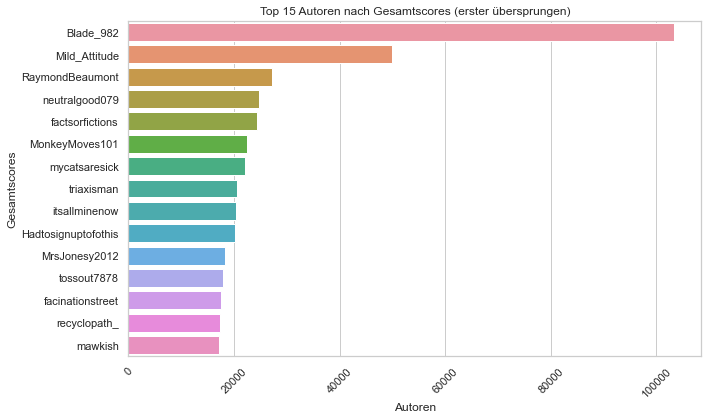

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: merged_df ist dein DataFrame mit den entsprechenden Spalten
# Stellen Sie sicher, dass Sie denselben DataFrame-Namen verwenden

# Autoren nach Gesamtscores gruppieren
author_scores = df.groupby('author')['score'].sum()

# Autoren nach Gesamtscores absteigend sortieren
sorted_authors = author_scores.sort_values(ascending=False)

# Den ersten Autor aus der sortierten Liste entfernen
sorted_authors = sorted_authors.iloc[1:]

# Die Top 15 Autoren auswählen
top_authors = sorted_authors.head(15)

# Plot mit Seaborn erstellen
plt.figure(figsize=(10, 6))
sns.barplot(y=top_authors.index, x=top_authors.values)
plt.title('Top 15 Autoren nach Gesamtscores (erster übersprungen)')
plt.xlabel('Autoren')
plt.ylabel('Gesamtscores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Column removing

In [190]:
df=df.drop(["author_flair_css_class", "subreddit","retrieved_on","subreddit_id","is_submitter","subreddit_type","author_cakeday","permalink"], axis = 1)

In [191]:
df=df.drop(["author_flair_background_color","collapsed","collapsed_reason","send_replies"], axis = 1)

In [193]:
df=df.drop(["author_created_utc","author_flair_template_id","author_flair_text_color","author_fullname","can_gild","gildings","no_follow","subreddit_name_prefixed","author_flair_richtext","author_flair_type","author_patreon_flair"], axis = 1)

In [195]:
df=df.drop(["all_awardings","associated_award","author_premium","collapsed_because_crowd_control","locked","total_awards_received"], axis = 1)

In [196]:
df.columns

Index(['archived', 'author', 'author_flair_text', 'body',
       'collapsed_reason_code', 'comment_type', 'controversiality',
       'created_utc', 'distinguished', 'edited', 'gilded', 'id', 'link_id',
       'name', 'parent_id', 'score', 'score_hidden', 'stickied',
       'top_awarded_type', 'treatment_tags', 'unrepliable_reason', 'editable',
       'created_hour', 'created_day', 'created_year'],
      dtype='object')

In [197]:
df=df.drop(["archived","collapsed_reason_code","comment_type","score_hidden","top_awarded_type","treatment_tags","unrepliable_reason","editable"], axis = 1)

In [199]:
df=df.drop(["name"], axis = 1)

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 801588 entries, 0 to 865340
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   author             801588 non-null  object        
 1   author_flair_text  801588 non-null  object        
 2   body               801587 non-null  object        
 3   controversiality   801588 non-null  object        
 4   created_utc        801588 non-null  datetime64[ns]
 5   distinguished      801588 non-null  object        
 6   edited             801588 non-null  object        
 7   gilded             801588 non-null  object        
 8   id                 801588 non-null  object        
 9   link_id            801588 non-null  object        
 10  parent_id          801588 non-null  object        
 11  score              801588 non-null  int64         
 12  stickied           801588 non-null  object        
 13  created_hour       801588 non-null  int64        

In [201]:
df.isnull().sum() 

author               0
author_flair_text    0
body                 1
controversiality     0
created_utc          0
distinguished        0
edited               0
gilded               0
id                   0
link_id              0
parent_id            0
score                0
stickied             0
created_hour         0
created_day          0
created_year         0
dtype: int64

# Row Deleting

# Delet all comments that have a NA

In [202]:
df[pd.isna(df['body'])]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
121327,Dsg1695,0,NaN,0,2021-11-04 23:40:34,0,0,0,hjclydm,t3_qmxmml,t1_hjck0yk,-1,0,23,4,2021


In [203]:
df = df.dropna(subset=['body'])

In [204]:
df.isnull().sum() 

author               0
author_flair_text    0
body                 0
controversiality     0
created_utc          0
distinguished        0
edited               0
gilded               0
id                   0
link_id              0
parent_id            0
score                0
stickied             0
created_hour         0
created_day          0
created_year         0
dtype: int64

# Body Analyses and Pre processing

[deleted]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  53580
[removed]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  19458
Thank you                             

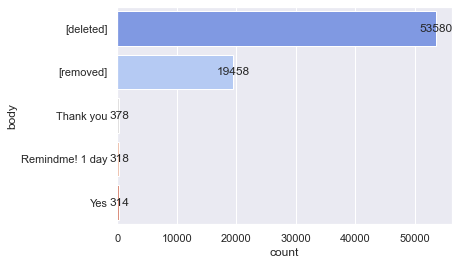

In [205]:
# Countplot für die "body"-Spalte mit den Top 3 Werten erstellen
sns.set(style="darkgrid")
ax = sns.countplot(y="body", data=df, palette="coolwarm",
              order=df.body.value_counts().iloc[:5].index)

# Counts in das Plot-Diagramm einfügen
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='center', va='center')

# Counts für die Werte in der "body"-Spalte ausgeben
print(df["body"].value_counts())

# Haben Removed comments mehr likes

In [206]:
filtered_df=df[df['body'] == '[removed]']

In [207]:
filtered_df.describe()

,score,created_hour,created_day,created_year
count,19458.000000,19458.000000,19458.000000,19458.0
mean,2.865557,12.749872,15.345822,2021.0
std,50.137292,6.660682,8.812174,0.0
min,-1674.000000,0.000000,1.000000,2021.0
25%,0.000000,7.000000,8.000000,2021.0
50%,1.000000,14.000000,15.000000,2021.0
75%,1.000000,18.000000,23.000000,2021.0
max,1960.000000,23.000000,30.000000,2021.0


In [208]:
len(filtered_df)

19458

Text(0.5, 1.0, 'Histogramm der Scores')

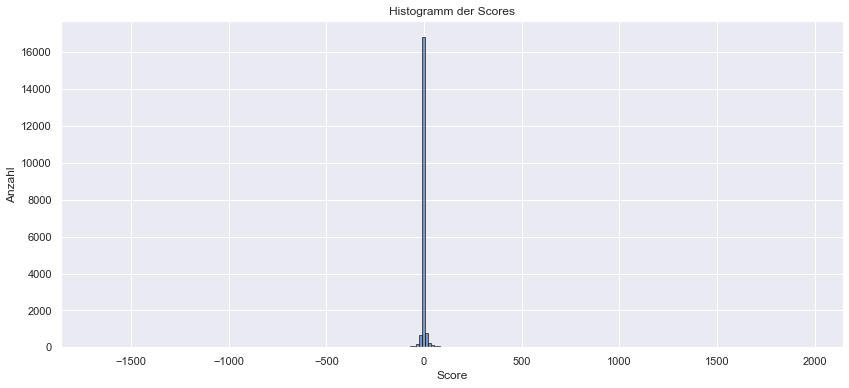

In [209]:
# Countplot für die "score"-Spalte erstellen
plt.figure(figsize=(14, 6))
plt.hist(filtered_df['score'], bins=240, edgecolor='k', alpha=0.7)
plt.xlabel('Score')
plt.ylabel('Anzahl')
plt.title('Histogramm der Scores')

Removed Kommentare löschen

In [210]:
df = df[df['body'] != '[removed]']

[deleted]                                                                                                                                                                                                                                                                                                                                                                                                                                  53580
Thank you                                                                                                                                                                                                                                                                                                                                                                                                                                    378
Remindme! 1 day                                                                                                                       

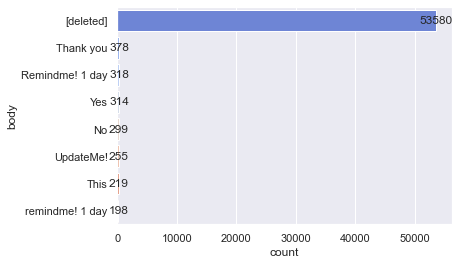

In [211]:
# Countplot für die "body"-Spalte mit den Top 3 Werten erstellen
sns.set(style="darkgrid")
ax = sns.countplot(y="body", data=df, palette="coolwarm",
              order=df.body.value_counts().iloc[:8].index)

# Counts in das Plot-Diagramm einfügen
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='center', va='center')

# Counts für die Werte in der "body"-Spalte ausgeben
print(df["body"].value_counts())

# Haben Deleted comments mehr likes

In [212]:
filtered_df_del=df[df['body'] == '[deleted]']

In [213]:
filtered_df_del

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
22,[deleted],0,[deleted],0,2021-11-01 00:01:27,0,0,0,hitrttc,t3_qjujsd,t3_qjujsd,1,0,0,1,2021
61,[deleted],0,[deleted],0,2021-11-01 00:03:44,0,0,0,hits36t,t3_qjujsd,t1_hiswd2c,14,0,0,1,2021
78,[deleted],0,[deleted],0,2021-11-01 00:04:56,0,0,0,hits87q,t3_qhzt48,t1_higro0c,1,0,0,1,2021
82,[deleted],0,[deleted],0,2021-11-01 00:05:04,0,1,0,hits8re,t3_qjxe6f,t1_hito2d1,10,0,0,1,2021
87,[deleted],0,[deleted],0,2021-11-01 00:05:14,0,0,0,hits9k0,t3_qk1m28,t3_qk1m28,1,0,0,1,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865171,[deleted],0,[deleted],0,2021-11-30 23:51:27,0,0,0,hmq9jjz,t3_r60ukk,t3_r60ukk,1,0,23,30,2021
865184,[deleted],0,[deleted],0,2021-11-30 23:52:04,0,0,0,hmq9mjq,t3_r60i28,t1_hmq91kg,3,0,23,30,2021
865207,[deleted],0,[deleted],0,2021-11-30 23:53:23,0,0,0,hmq9szf,t3_r606v9,t1_hmq9935,0,0,23,30,2021
865266,[deleted],0,[deleted],0,2021-11-30 23:56:01,0,0,0,hmqa5pv,t3_r5v7bw,t3_r5v7bw,1,0,23,30,2021


In [214]:
filtered_df_del.describe()

,score,created_hour,created_day,created_year
count,53580.000000,53580.000000,53580.000000,53580.0
mean,4.552930,12.459593,15.402856,2021.0
std,50.713594,7.158973,8.725178,0.0
min,-559.000000,0.000000,1.000000,2021.0
25%,1.000000,6.000000,8.000000,2021.0
50%,1.000000,14.000000,15.000000,2021.0
75%,2.000000,19.000000,23.000000,2021.0
max,3443.000000,23.000000,30.000000,2021.0


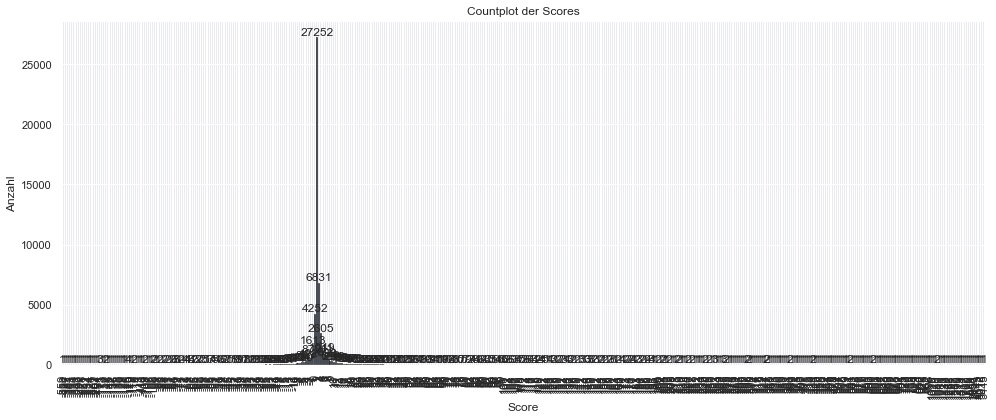

In [215]:
plt.figure(figsize=(14, 6))
counts = filtered_df_del['score'].value_counts().sort_index()
ax = counts.plot(kind='bar', edgecolor='k', alpha=0.7)
plt.xlabel('Score')
plt.ylabel('Anzahl')
plt.title('Countplot der Scores')
plt.tight_layout()
# Counts über den Balken anzeigen
for i, v in enumerate(counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

Kommentare die deleted wurden löschen

In [216]:
df = df[df['body'] != '[deleted]']

Thank you                                                                                                                                                                                                                                                                                                                                                                                                                                  378
Remindme! 1 day                                                                                                                                                                                                                                                                                                                                                                                                                            318
Yes                                                                                                                                       

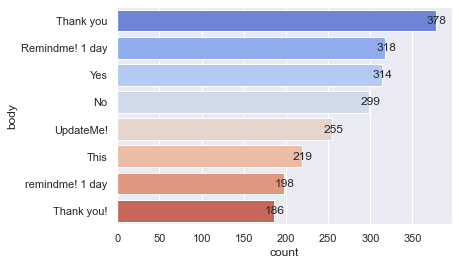

In [217]:
# Countplot für die "body"-Spalte mit den Top 3 Werten erstellen
sns.set(style="darkgrid")
ax = sns.countplot(y="body", data=df, palette="coolwarm",
              order=df.body.value_counts().iloc[:8].index)

# Counts in das Plot-Diagramm einfügen
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='center', va='center')

# Counts für die Werte in der "body"-Spalte ausgeben
print(df["body"].value_counts())

In [218]:
df[df['body'] == "."]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
19158,rosehasteeth,0,.,0,2021-11-01 17:31:47,0,1,0,hiwnjqa,t3_qk7f3e,t1_hiwkqqz,19,0,17,1,2021
37387,rosehasteeth,0,.,0,2021-11-02 07:23:59,0,1,0,hizhw81,t3_qky7k1,t3_qky7k1,1,0,7,2,2021
92365,rokman,0,.,0,2021-11-04 01:09:49,0,0,0,hj85x2u,t3_qm95hn,t3_qm95hn,0,0,1,4,2021
136757,nicole0107,0,.,0,2021-11-05 15:10:33,0,0,0,hjf9fjt,t3_qncv40,t3_qncv40,1,0,15,5,2021
162251,_Dio_Brando___,0,.,0,2021-11-06 13:40:28,0,0,0,hjjs8j4,t3_qny6s6,t3_qny6s6,1,0,13,6,2021
217292,ohwalestenn,0,.,0,2021-11-08 15:21:20,0,0,0,hjt8v6r,t3_qpcxki,t3_qpcxki,1,0,15,8,2021
256138,Ky1e123,0,.,0,2021-11-09 21:14:43,0,1,0,hjzh9gi,t3_qqd59s,t1_hjzfq7j,1,0,21,9,2021
322613,DeliciousMud7291,0,.,0,2021-11-12 04:36:25,0,1,0,hkan7dw,t3_qs1o57,t1_hkabr8t,1,0,4,12,2021
346643,Traditional_Front637,0,.,0,2021-11-13 00:43:16,0,1,0,hkegqh7,t3_qs2z9v,t3_qs2z9v,2,0,0,13,2021
353596,Onlythebestanswers,0,.,0,2021-11-13 07:24:16,0,0,0,hkfmw2g,t3_qspn9x,t1_hkfg9qr,-5,0,7,13,2021


In [219]:
df = df[df['body'] != '.']

In [220]:
df[df['body'] == "."]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [221]:
df[df['body'] == "F"]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
81307,PaneerMakhni,0,F,0,2021-11-03 17:49:26,0,0,0,hj6cnte,t3_qlx6xh,t1_hj5ylx2,8,0,17,3,2021
84652,i_aam_sadd,0,F,0,2021-11-03 19:57:40,0,0,0,hj6wr2r,t3_qljz5o,t1_hj649fz,14,0,19,3,2021
113652,According_Brief_7290,0,F,0,2021-11-04 18:50:43,0,0,0,hjbevhv,t3_qmnk94,t3_qmnk94,2,0,18,4,2021
134601,Cool_As_Your_Dad,0,F,0,2021-11-05 13:48:02,0,0,0,hjexfna,t3_qnawd7,t1_hjetsjl,91,0,13,5,2021
174118,OriginalUsernameee69,0,F,0,2021-11-06 22:57:22,0,0,0,hjlw914,t3_qo64yx,t3_qo64yx,3,0,22,6,2021
278442,Diamond_tip,0,F,0,2021-11-10 17:16:43,0,0,0,hk39kwn,t3_qqxms8,t1_hk2z4yw,1,0,17,10,2021
718847,WildBill993,0,F,0,2021-11-25 23:00:53,0,0,0,hm38wbw,t3_r1xdlj,t3_r1xdlj,2,0,23,25,2021


In [222]:
df = df[df['body'] != 'F']

In [223]:
df[df['body'].str.contains('Remind me!')]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
72874,Rjspringsteen11,0,Remind me! 24 hours,0,2021-11-03 12:06:00,0,0,0,hj4z4na,t3_qlqgah,t3_qlqgah,3,0,12,3,2021
109327,venomous2868,0,Remind me! 2 days,0,2021-11-04 16:33:17,0,0,0,hjatp12,t3_qmkx9x,t1_hjagnr2,17,0,16,4,2021
109670,akstary,0,Remind me! 2 days,0,2021-11-04 16:42:50,0,0,0,hjav7fz,t3_qmkx9x,t3_qmkx9x,0,0,16,4,2021
109900,kupozen,0,Remind me! 2 days,0,2021-11-04 16:49:09,0,0,0,hjaw6rg,t3_qmkx9x,t1_hjatp12,0,0,16,4,2021
110078,thegaffermind,0,Remind me! 1 day,0,2021-11-04 16:54:08,0,0,0,hjawyoi,t3_qmkx9x,t3_qmkx9x,1,0,16,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758004,Kingbee1031,0,Remind me! 1day,0,2021-11-27 10:18:58,0,0,0,hm9dxnc,t3_r34vqb,t3_r34vqb,1,0,10,27,2021
758162,WCheesecake,0,Remind me! 2 days,0,2021-11-27 10:30:37,0,0,0,hm9eqaw,t3_r34vqb,t1_hm8iwtl,1,0,10,27,2021
758357,shantti,0,Remind me! 1 day,0,2021-11-27 10:44:54,0,0,0,hm9fq09,t3_r34vqb,t1_hm9chil,1,0,10,27,2021
759187,Ramitg7,0,Remind me! 1 day,0,2021-11-27 11:41:23,0,0,0,hm9jpc9,t3_r34vqb,t1_hm9chil,1,0,11,27,2021


In [229]:
df = df[~df['body'].str.contains('Remind me!')]

In [232]:
df[df['body'].str.contains('Remind me 16')]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
170275,throwawaygen10,0,Remind me 16 hours!,0,2021-11-06 20:03:20,0,0,0,hjl8ynu,t3_qo81tf,t3_qo81tf,0,0,20,6,2021


In [233]:
df = df[~df['body'].str.contains("Remind me 16")]

In [242]:
df = df[~df['body'].str.contains("!Remind me")]

In [252]:
df = df[~df['body'].str.contains("!remindme")]

In [253]:
df = df[~df['body'].str.contains("!remind")]

In [254]:
df[df['body'].str.contains("!remind me")]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [256]:

df = df[~df['body'].str.contains("Remindme! 1 day")]

In [258]:
df = df[~df['body'].str.contains("UpdateMe!")]

In [260]:

df = df[~df['body'].str.contains("remindme! 1 day")]

Thank you                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

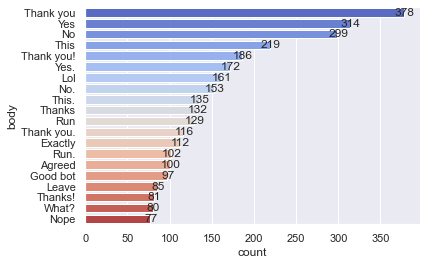

In [262]:
# Countplot für die "body"-Spalte mit den Top 3 Werten erstellen
sns.set(style="darkgrid")
ax = sns.countplot(y="body", data=df, palette="coolwarm",
              order=df.body.value_counts().iloc[:20].index)

# Counts in das Plot-Diagramm einfügen
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='center', va='center')

# Counts für die Werte in der "body"-Spalte ausgeben
print(df["body"].value_counts())

In [263]:
#df[df['body'].str.contains("If you or someone you know is contemplating suicide")]
#hotlinehelpbot
df[df['author'].str.contains("hotlinehelpbot")]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
235,hotlinehelpbot,0,\nIf you or someone you know is contemplating ...,0,2021-11-01 00:14:34,0,0,0,hittc3w,t3_qk26vb,t3_qk26vb,3,0,0,1,2021
1833,hotlinehelpbot,0,\nIf you or someone you know is contemplating ...,0,2021-11-01 01:33:49,0,0,0,hiu2l3d,t3_qk3hy8,t3_qk3hy8,6,0,1,1,2021
2570,hotlinehelpbot,0,\nIf you or someone you know is contemplating ...,0,2021-11-01 02:09:41,0,0,0,hiu6r61,t3_qk44cp,t3_qk44cp,2,0,2,1,2021
3060,hotlinehelpbot,0,\nIf you or someone you know is contemplating ...,0,2021-11-01 02:35:35,0,0,0,hiu9p5s,t3_qk4k0t,t3_qk4k0t,1,0,2,1,2021
4071,hotlinehelpbot,0,\nIf you or someone you know is contemplating ...,0,2021-11-01 03:23:45,0,0,0,hiuf5o3,t3_qk5cfi,t3_qk5cfi,1,0,3,1,2021
5853,hotlinehelpbot,0,\nIf you or someone you know is contemplating ...,0,2021-11-01 05:00:35,0,0,0,hiuol2k,t3_qk6umt,t3_qk6umt,1,0,5,1,2021
10904,hotlinehelpbot,0,\nIf you or someone you know is contemplating ...,0,2021-11-01 11:14:10,0,0,0,hivdxqx,t3_qkbp8q,t3_qkbp8q,1,0,11,1,2021
11618,hotlinehelpbot,0,\nIf you or someone you know is contemplating ...,0,2021-11-01 11:57:52,0,0,0,hivhmnn,t3_qkcdar,t3_qkcdar,1,0,11,1,2021
13237,hotlinehelpbot,0,\nIf you or someone you know is contemplating ...,0,2021-11-01 13:13:42,0,0,0,hivp5xe,t3_qkdpui,t3_qkdpui,1,0,13,1,2021
20291,hotlinehelpbot,0,\nIf you or someone you know is contemplating ...,0,2021-11-01 18:22:38,0,0,0,hiwuz45,t3_qkk7kj,t3_qkk7kj,1,0,18,1,2021


In [264]:
df = df[~df['author'].str.contains("hotlinehelpbot")]
RemindMe! 1 day

In [265]:
df[df['author'].str.contains("hotlinehelpbot")]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [270]:
df = df[~df['body'].str.contains("RemindMe! 1 day")]

This!               75
How old are you?    72
Dump him            71
Ok                  71
True                69
😂                   68
Why?                68
I agree             66
Same                62
Lmao                60
Name: body, dtype: int64


/Users/anthonyfernando/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 128514 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anthonyfernando/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 128514 missing from current font.
  font.set_text(s, 0, flags=flags)


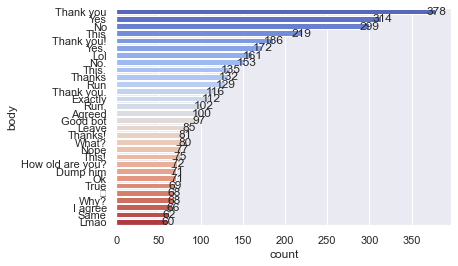

In [272]:
# Countplot für die "body"-Spalte mit den Top 3 Werten erstellen
sns.set(style="darkgrid")
ax = sns.countplot(y="body", data=df, palette="coolwarm",
              order=df.body.value_counts().iloc[:30].index)

# Counts in das Plot-Diagramm einfügen
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='center', va='center')

# Counts für die Werte in der "body"-Spalte ausgeben
print(df["body"].value_counts().iloc[20:30])

In [273]:
df[df['author'].str.contains("Reddit-Book-Bot")]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [280]:
df[df['body'].str.contains("Beep.")]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
386432,mollyec,0,Beep boop I’m NOT a plagiarism bot but this is...,0,2021-11-14 13:51:58,0,0,0,hkl5r24,t3_qtektl,t1_hkkch2r,17,0,13,14,2021
826381,i-Ake,Early 30s Female,\n\nHe has allowed you many times in the past....,0,2021-11-29 19:31:57,0,1,0,hmkfyqm,t3_r53g77,t3_r53g77,32,0,19,29,2021


In [275]:
df = df[~df['author'].str.contains("WikiMobileLinkBot")]

In [281]:
df = df[~df['author'].str.contains("mollyec")]

In [282]:
df = df[~df['author'].str.contains("Listening70")]

In [283]:
df = df[~df['author'].str.contains("paragraphiser_bot")]

In [284]:
df = df[~df['author'].str.contains("NoGoogleAMPBot")]

Thank you                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  378
Yes                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        314
No                                        

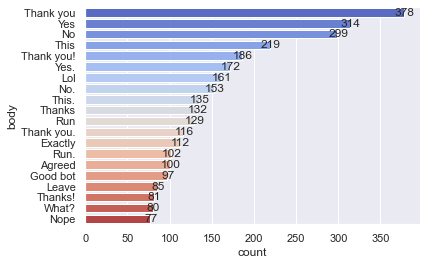

In [285]:
# Countplot für die "body"-Spalte mit den Top 3 Werten erstellen
sns.set(style="darkgrid")
ax = sns.countplot(y="body", data=df, palette="coolwarm",
              order=df.body.value_counts().iloc[:20].index)

# Counts in das Plot-Diagramm einfügen
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='center', va='center')

# Counts für die Werte in der "body"-Spalte ausgeben
print(df["body"].value_counts())

In [287]:
df[df['body'].str.contains("boop")]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
8609,reply-guy-bot,0,The above comment was stolen from [this one](h...,0,2021-11-01 08:28:42,0,0,0,hiv2szi,t3_qk29zp,t1_hiurv2f,23,0,8,1,2021
8610,reply-guy-bot,0,The above comment was stolen from [this one](h...,0,2021-11-01 08:28:44,0,0,0,hiv2t23,t3_qk0m2x,t1_hiurs24,21,0,8,1,2021
8612,reply-guy-bot,0,The above comment was stolen from [this one](h...,0,2021-11-01 08:28:46,0,0,0,hiv2t51,t3_qk0m2x,t1_hiurtfp,30,0,8,1,2021
19124,reply-guy-bot,0,The above comment was stolen from [this one](h...,0,2021-11-01 17:29:50,0,0,0,hiwn9ea,t3_qkcdvk,t1_hiwgma8,3,0,17,1,2021
25927,reply-guy-bot,0,The above comment was stolen from [this one](h...,0,2021-11-01 21:41:51,0,0,0,hixoadr,t3_qkhy9e,t1_hix8jtf,24,0,21,1,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850411,reply-guy-bot,0,The above comment was stolen from [this one](h...,0,2021-11-30 14:47:43,0,0,0,hmo17oz,t3_r4zxd9,t1_hmnuem5,2,0,14,30,2021
850412,reply-guy-bot,0,The above comment was stolen from [this one](h...,0,2021-11-30 14:47:45,0,0,0,hmo17vc,t3_r5g65n,t1_hmnuduw,11,0,14,30,2021
850413,reply-guy-bot,0,The above comment was stolen from [this one](h...,0,2021-11-30 14:47:48,0,0,0,hmo181a,t3_r53kmu,t1_hmnubh9,2,0,14,30,2021
850414,reply-guy-bot,0,The above comment was stolen from [this one](h...,0,2021-11-30 14:47:50,0,0,0,hmo186p,t3_r536o4,t1_hmnu7yu,5,0,14,30,2021


In [288]:
df = df[~df['author'].str.contains("reply-guy-bot")]

In [289]:
df[df['body'].str.contains("boop")]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
111621,Kveld_Ulf,0,It's perfectly OK to not give a damn for speci...,0,2021-11-04 17:33:09,0,0,0,hjb302f,t3_qm96f1,t1_hj87ixg,12,0,17,4,2021
178047,Sand-Covered-Grass,Early 30s Male,"&gt;I really hate that, baseless assumptions b...",0,2021-11-07 02:06:15,0,0,0,hjmkc4l,t3_qo9ijl,t1_hjmk080,-1,0,2,7,2021
258997,sub_doesnt_exist_bot,0,The subreddit r/oddlyspecificsuperpowers does ...,0,2021-11-09 23:02:32,0,0,0,hjzx2jm,t3_qqdzzr,t1_hjzx0pj,0,0,23,9,2021
326573,Neonwatermellon,0,"I'm in agreement with everyone here, you do no...",0,2021-11-12 08:45:11,0,0,0,hkb8v73,t3_qs3tdg,t3_qs3tdg,3,0,8,12,2021
349714,Routine_Course_4978,0,This used to be me and I was smashing and dash...,0,2021-11-13 03:17:03,0,0,0,hkezbkg,t3_qsrhwv,t3_qsrhwv,1,0,3,13,2021
468953,sub_doesnt_exist_bot,0,The subreddit r/waiting_to_be_wed does not exi...,0,2021-11-17 06:22:43,0,0,0,hkyi6vj,t3_qvqgcs,t1_hkyi5xr,3,0,6,17,2021
504910,rapidecroche,0,Tickling and booping each other’s noses.,0,2021-11-18 13:54:56,0,0,0,hl4cbwh,t3_qwpzgz,t3_qwpzgz,1,0,13,18,2021
758794,BlazeyTheBear,0,The above comment was stolen from [this one](h...,0,2021-11-27 11:14:15,0,0,0,hm9hrm2,t3_r34vqb,t1_hm9agju,1,0,11,27,2021
792242,Decent_Ad6389,0,"I would have been out with ""joke chokehold tha...",0,2021-11-28 16:26:46,0,0,0,hmey48v,t3_r45y58,t3_r45y58,7,0,16,28,2021
807734,Anonmom0410,0,"Yeah I feel like if he came at you so angry, t...",0,2021-11-29 02:52:22,0,0,0,hmhfs1s,t3_r45y58,t3_r45y58,1,0,2,29,2021


In [290]:

df = df[~df['author'].str.contains("sub_doesnt_exist_bot")]

In [291]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
Index: 727011 entries, 1 to 865340
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   author             727011 non-null  object        
 1   author_flair_text  727011 non-null  object        
 2   body               727011 non-null  object        
 3   controversiality   727011 non-null  object        
 4   created_utc        727011 non-null  datetime64[ns]
 5   distinguished      727011 non-null  object        
 6   edited             727011 non-null  object        
 7   gilded             727011 non-null  object        
 8   id                 727011 non-null  object        
 9   link_id            727011 non-null  object        
 10  parent_id          727011 non-null  object        
 11  score              727011 non-null  int64         
 12  stickied           727011 non-null  object        
 13  created_hour       727011 non-null  int64        

# Http und Https and Redditnames removen

In [292]:
df = df.drop(df[df['author'] == 'AutoModerator'].index)

In [293]:
selected_sub_men=df[df['body'].str.fullmatch(r'/r/[^/\s]+')]
selected_sub_men

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
12282,zfxxnzdn,0,/r/lostredditors,0,2021-11-01 12:32:08,0,0,0,hivkt00,t3_qkcybx,t3_qkcybx,1,0,12,1,2021
43040,Seathing,0,/r/arethestraightsok,0,2021-11-02 13:53:07,0,0,0,hj0f0le,t3_qkh09i,t1_hj01sjj,1,0,13,2,2021
86032,cup_1337,0,/r/lefttheburneron,0,2021-11-03 20:48:49,0,0,0,hj74t40,t3_qlv6lc,t1_hj6rr0z,6,0,20,3,2021
109499,QuietudeOfHeart,0,/r/DeadBedrooms,0,2021-11-04 16:37:49,0,0,0,hjauf3g,t3_qmoms1,t3_qmoms1,2,0,16,4,2021
117306,Fuzzy-Constant,40s Male,/r/loseit,0,2021-11-04 21:05:00,0,0,0,hjbzf20,t3_qmta6y,t3_qmta6y,1,0,21,4,2021
131749,wiiwoooo,0,/r/cringe,0,2021-11-05 10:50:41,0,0,0,hjeeg60,t3_qn8d3y,t3_qn8d3y,2,0,10,5,2021
151568,Fuzzy-Constant,40s Male,/r/raisedbynarcissists,0,2021-11-06 01:07:05,0,0,0,hjhs84z,t3_qncst3,t3_qncst3,3,0,1,6,2021
287518,KyndraIsADumbName,0,/r/Iam14andthisisdeep,0,2021-11-10 22:38:36,0,0,0,hk4n3xz,t3_qr4mr1,t1_hk4m0as,6,0,22,10,2021
319097,Thricey,0,/r/confidentlyincorrect,0,2021-11-12 01:19:57,0,0,0,hk9yaw4,t3_qrtty8,t1_hk9vkfc,10,0,1,12,2021
331652,[deleted],0,/r/RealsCatGirls,0,2021-11-12 14:25:32,0,0,0,hkc2wvi,t3_qr531t,t1_hk9ab7m,1,0,14,12,2021


In [294]:
# Zeilen löschen, die der URL-Bedingung entsprechen
df = df.drop(selected_sub_men.index)

In [295]:
selected_rows = df[df['body'].str.match(r'^http://[^:/\s]+/[^:/\s]+$')]

# Die ausgewählten Zeilen anzeigen
selected_rows

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [296]:
df = df.drop(selected_rows.index)

In [297]:
selected_rows_2 = df[df['body'].str.match(r'^https://[^:/\s]+/[^:/\s]+$')]

# Die ausgewählten Zeilen anzeigen
selected_rows_2

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
14526,Puzzleheaded-Dig9832,0,https://youtu.be/OW4hGV30s6Y,0,2021-11-01 14:12:50,0,0,0,hivw717,t3_q6nvw8,t3_q6nvw8,1,0,14,1,2021
25090,DowntownPickle9077,0,https://discord.gg/wMjaw3vC,0,2021-11-01 21:05:45,0,0,0,hixj2k5,t3_qkhy9e,t3_qkhy9e,1,0,21,1,2021
25358,aujcy,0,https://youtu.be/Xw4JP3bEvng,0,2021-11-01 21:17:44,0,0,0,hixksfo,t3_qk7qu2,t3_qk7qu2,1,0,21,1,2021
26688,AscendantComic,0,https://www.youtube.com/watch?v=Sw6-uJCfeiE,0,2021-11-01 22:11:31,0,0,0,hixshsn,t3_qkewuw,t3_qkewuw,1,0,22,1,2021
71366,BridgeBurner22,0,https://youtu.be/4Xp4z5qlyqs,0,2021-11-03 10:26:09,0,0,0,hj4q222,t3_qlji1h,t1_hj3e2fe,5,0,10,3,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786690,Frozzenpeass,0,https://www.youtube.com/watch?v=ZYb\_8MM1tGQ,0,2021-11-28 12:06:16,0,0,0,hme4vmi,t3_r3b6ut,t1_hme4eh0,1,0,12,28,2021
800875,Plazzmius,0,https://youtu.be/RkJKp724q58,0,2021-11-28 22:05:25,0,0,0,hmgckat,t3_r47q82,t1_hmgbvq4,1,0,22,28,2021
827712,IsshinDZahul,0,https://www.urbandictionary.com/define.php?ter...,0,2021-11-29 20:21:11,0,0,0,hmknamo,t3_r54fmk,t1_hmkn2kd,2,0,20,29,2021
840547,PandaKaiKai,0,https://i.imgur.com/OxeDpqx.jpg,0,2021-11-30 05:09:50,0,0,0,hmmmjnr,t3_r50exy,t3_r50exy,1,0,5,30,2021


In [298]:
df = df.drop(selected_rows_2.index)

In [299]:
selected_sub_men=df[df['body'].str.fullmatch(r'/r/[^/\s]+')]
selected_sub_men

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [300]:
selected_sub_men_two=df[df['body'].str.fullmatch(r'r/[^/\s]+')]
selected_sub_men_two

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
1583,philthekrill,0,r/nobodyasked,0,2021-11-01 01:20:31,0,0,0,hiu113w,t3_qjxe6f,t1_hitxfu2,-29,0,1,1,2021
9414,jimperkask,0,r/socialskills,0,2021-11-01 09:28:42,0,0,0,hiv6gk1,t3_qk7qu2,t3_qk7qu2,1,0,9,1,2021
9459,SaraRainmaker,0,r/lostredditors,0,2021-11-01 09:31:56,0,0,0,hiv6nux,t3_qka9x6,t3_qka9x6,3,0,9,1,2021
12721,saintgermaunt,0,r/incel,0,2021-11-01 12:51:31,0,0,0,hivmscm,t3_qkd5wi,t3_qkd5wi,4,0,12,1,2021
15059,reddishrobin,0,r/deadbedrooms,0,2021-11-01 14:33:21,0,0,0,hivyvca,t3_qk3c0e,t3_qk3c0e,1,0,14,1,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835435,zurichtime,0,r/trashy,0,2021-11-30 01:44:15,0,0,0,hmlwgly,t3_r520nb,t1_hmk6bw2,6,0,1,30,2021
836942,Of-Unknown-Origin,0,r/hermancainaward,0,2021-11-30 02:38:31,0,0,0,hmm3oyf,t3_r570bp,t3_r570bp,1,0,2,30,2021
848642,r_drino,0,r/glitchinthematrix,0,2021-11-30 13:30:37,0,0,0,hmnrsku,t3_r5ekph,t1_hmn8plf,0,0,13,30,2021
859120,Mr-Robot59,0,r/thathappened,1,2021-11-30 19:41:27,0,0,0,hmp94nx,t3_r5tg48,t1_hmp2bho,17,0,19,30,2021


In [301]:
# Zeilen löschen, die der URL-Bedingung entsprechen
df = df.drop(selected_sub_men_two.index)

In [302]:
selected_rows = df[df['body'].str.match(r'^http://[^:/\s]+/[^:/\s]+$')]

# Die ausgewählten Zeilen anzeigen
selected_rows

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [303]:
selected_rows_2 = df[df['body'].str.match(r'^https://[^:/\s]+/[^:/\s]+$')]

# Die ausgewählten Zeilen anzeigen
selected_rows_2

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [304]:
import re

# Regulärer Ausdruck zum Erfassen von Zeilen, die nur aus Links/URLs bestehen
url_pattern = r'^https?://[^\s/$.?#].[^\s]*$'

# Anwenden des regulären Ausdrucks auf die 'body'-Spalte
url_only_rows = df[df['body'].str.match(url_pattern, flags=re.IGNORECASE)]
url_only_rows

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
1521,smittenwithkitteb,0,https://www.reddit.com/r/relationship_advice/c...,0,2021-11-01 01:16:54,0,0,0,hiu0lv5,t3_qjz955,t1_hiu0hat,14,0,1,1,2021
4351,Acceptable_Ad_6615,0,https://www.kron4.com/news/national/burning-sa...,0,2021-11-01 03:35:56,0,0,0,hiugj75,t3_qj9xvk,t1_hiu6g7b,1,0,3,1,2021
5199,missvvvv,0,https://www.mindbodygreen.com/articles/trauma-...,0,2021-11-01 04:17:32,0,0,0,hiuksl4,t3_qk18zv,t1_hiukfvv,1,0,4,1,2021
5310,missvvvv,0,https://www.mindbodygreen.com/articles/trauma-...,0,2021-11-01 04:24:17,0,0,0,hiulfmo,t3_qk18zv,t1_hitrbg4,2,0,4,1,2021
18984,00Lisa00,0,https://introvertdear.com/news/extroverted-int...,0,2021-11-01 17:22:56,0,0,0,hiwm95f,t3_qkiegq,t1_hiwkdmw,1,0,17,1,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855427,pelisalami,0,https://telegr.im/joinchat/ZFRnItoS3MdjM2Vh,0,2021-11-30 17:45:31,0,0,0,hmorl5o,t3_r5na05,t3_r5na05,1,0,17,30,2021
855434,pelisalami,0,https://telegr.im/joinchat/ZFRnItoS3MdjM2Vh,0,2021-11-30 17:45:42,0,0,0,hmorm32,t3_r5nxx4,t3_r5nxx4,1,0,17,30,2021
859022,mawkish,0,https://en.wikipedia.org/wiki/Transgenerationa...,0,2021-11-30 19:38:05,0,0,0,hmp8mbd,t3_r5r7sr,t1_hmp4y0y,2,0,19,30,2021
865064,fluffability,0,https://medium.com/fearless-she-wrote/how-mens...,0,2021-11-30 23:46:01,0,0,0,hmq8t37,t3_r5xayw,t3_r5xayw,100,0,23,30,2021


In [305]:
df.drop(url_only_rows.index, inplace=True)

# Delet Bots

In [306]:
helper_bot_rows = df[df['body'].str.startswith('Helper bot')]
helper_bot_rows

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [307]:
df[df['author'] == 'theHelperdroid']

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [310]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["Bot_Metric","paragraphiser_bot","PORTMANTEAU-BOT","TotesMessenger","RemindMeBot","RAdviceBot"]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

In [311]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["wikipedia_answer_bot","B0tRank","couldshouldwouldbot","nicebot2","AmputatorBot","rickroll-counter","Post_To_SPS_Warning","morse-bot","linebreaker-bot"]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

In [312]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["userleansbot"]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

In [313]:
import re

bot_in_body_rows = df[df['body'].str.contains(r'\b(bot)\b', case=False, regex=True)]
bot_in_body_rows

/var/folders/88/lkbjvmyj48n6h04_m1x2v3km0000gn/T/ipykernel_90176/2615394462.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  bot_in_body_rows = df[df['body'].str.contains(r'\b(bot)\b', case=False, regex=True)]


,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
105,Piper3331,0,Good bot,0,2021-11-01 00:06:32,0,0,0,hitsez0,t3_qjlbku,t1_hitc7hw,15,0,0,1,2021
1113,OilIcy6664,0,Good bot. Here's a cookie 🍪,0,2021-11-01 00:55:34,0,0,0,hity5of,t3_qjlbku,t1_hitc7hw,8,0,0,1,2021
3227,tossout7878,0,u/Depenenlock583 is a karma theft bot [copying...,0,2021-11-01 02:43:30,0,0,0,hiualzr,t3_qjnakc,t1_hirwela,6,0,2,1,2021
3248,tossout7878,0,"that user is a bot, the real user with that st...",0,2021-11-01 02:44:31,0,0,0,hiuaq7i,t3_qjnakc,t1_hisc028,5,0,2,1,2021
8923,tossout7878,0,"u/sinclairvcxgsdga is a karma theft bot, this ...",0,2021-11-01 08:50:22,0,0,0,hiv44h9,t3_qk49l4,t1_hiuxbia,27,0,8,1,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857354,throwsawaygoaway,0,maybe a post stealing bot?,0,2021-11-30 18:46:33,0,0,0,hmp0vif,t3_r5n9jf,t1_hmou7im,1,0,18,30,2021
857812,Kerostasis,0,That’s almost certainly because it’s a reply-s...,0,2021-11-30 19:01:08,0,0,0,hmp337l,t3_r5r7sr,t1_hmoxkdn,8,0,19,30,2021
858343,Rough_Wish3988,0,This is such a self-centered post. \n\nOver 90...,0,2021-11-30 19:17:52,0,1,0,hmp5l44,t3_r5r7sr,t3_r5r7sr,2,0,19,30,2021
863263,eazeaze,0,Suicide Hotline Numbers If you or anyone you k...,0,2021-11-30 22:27:34,0,0,0,hmpxvae,t3_r5tp9d,t1_hmpxu6z,4,0,22,30,2021


In [344]:
bot_in_body_rows.iloc[420:440]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [332]:

df[df['author'] == 'eazeaze'].head(3)

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
81924,eazeaze,0,Suicide Hotline Numbers If you or anyone you k...,0,2021-11-03 18:13:16,0,0,0,hj6gfo2,t3_qm0chs,t1_hj6gedr,1,0,18,3,2021
334714,eazeaze,0,Suicide Hotline Numbers If you or anyone you k...,0,2021-11-12 16:31:20,0,0,0,hkckrcn,t3_qsd2b6,t1_hkckqbu,1,0,16,12,2021
336089,eazeaze,0,Suicide Hotline Numbers If you or anyone you k...,0,2021-11-12 17:13:54,0,0,0,hkcr40o,t3_qsd2b6,t1_hkcr2ve,1,0,17,12,2021


In [345]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["impaulsive4real","ReverseCaptioningBot","eazeaze","kelvin_bot"]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

In [346]:
 df[df['author'] == 'AdviceHelperBot']

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [347]:
df_bot=pd.read_csv("bot_names.csv")

In [348]:
df_bot["Bot Name"].values.tolist()

selection = df_bot["Bot Name"].values.tolist()
mask = df["author"].apply(lambda x: any(item for item in selection if item in x)) 

In [349]:
df_check_bot=df.filter(items = mask[mask].index, axis=0)

In [350]:
df_check_bot

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
34,Zealousideal-Bell-68,0,It's perfectly normal to be conflicted about t...,0,2021-11-01 00:02:05,0,0,0,hitrwg4,t3_qk0u9v,t3_qk0u9v,-9,0,0,1,2021
42,Sassenatch,0,She already broke up with you but you just did...,0,2021-11-01 00:02:33,0,0,0,hitryco,t3_qjujsd,t3_qjujsd,1,0,0,1,2021
56,matts2,0,Is this Palestine boyfriend the one who cheate...,0,2021-11-01 00:03:27,0,0,0,hits21j,t3_qjwsoe,t1_hisu4af,1,0,0,1,2021
173,Hooosreddit,0,What do you want?,0,2021-11-01 00:10:51,0,0,0,hitsx2c,t3_qk1u1z,t3_qk1u1z,0,0,0,1,2021
204,MouthwashAndBandaids,Late 30s Female,Cool.,0,2021-11-01 00:12:55,0,0,0,hitt5ff,t3_qjyu0o,t1_hit7nzw,1,0,0,1,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864900,Hadtosignuptofothis,0,Firsts will do that because you don't have any...,0,2021-11-30 23:37:55,0,0,0,hmq7prd,t3_r5zyje,t1_hmq703b,2,0,23,30,2021
864943,DonaldDuck031,0,“Oddly I got lots of shocked and angry face” s...,0,2021-11-30 23:39:53,0,1,0,hmq7z8h,t3_r60p7q,t3_r60p7q,18,0,23,30,2021
864986,pineapplesrhot,0,You went through something so traumatic and he...,0,2021-11-30 23:41:56,0,0,0,hmq89bo,t3_r5ou3p,t3_r5ou3p,1,0,23,30,2021
865129,Head_Photograph9572,0,"An ""alpha"" male wouldn't drop 3 bills on a fir...",0,2021-11-30 23:49:42,0,0,0,hmq9av6,t3_r5xsg1,t3_r5xsg1,3,0,23,30,2021


In [351]:
df_check_bot[df_check_bot['author'].str.contains('bot')]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
2691,uniquehumannotabot,0,Write it on her forehead in EASILY WASHABLE MA...,0,2021-11-01 02:17:03,0,0,0,hiu7lce,t3_qjz955,t1_hit9zdb,8,0,2,1,2021
2708,uniquehumannotabot,0,Are you sure?,0,2021-11-01 02:17:52,0,0,0,hiu7olp,t3_qjz955,t1_hitujm3,31,0,2,1,2021
2738,uniquehumannotabot,0,Wait till you learn that some people with cert...,0,2021-11-01 02:19:18,0,0,0,hiu7u6u,t3_qjz955,t1_hiu4no8,57,0,2,1,2021
7526,danielbot1271,0,"Bruh leave, the gut is telling you it ain’t right",0,2021-11-01 07:02:13,0,0,0,hiuxeul,t3_qk0ghb,t3_qk0ghb,1,0,7,1,2021
18433,resavr_bot,0,*A relevant comment in this thread was deleted...,0,2021-11-01 16:59:35,0,0,0,hiwivfr,t3_qk9qy2,t3_qk9qy2,1,0,16,1,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828700,uniquehumannotabot,0,Wait... fine? Where in the world is there a fi...,0,2021-11-29 20:58:56,0,0,0,hmksz7l,t3_r4x18q,t1_hmk7v56,12,0,20,29,2021
836310,reddit_toast_bot,0,"Sorry that happened to you, what an asshat.",0,2021-11-30 02:16:31,0,0,0,hmm0p04,t3_r520nb,t3_r520nb,1,0,2,30,2021
844993,SugarPuffFoggybottom,0,He isn’t your friend at all -he’s a spoiled ch...,0,2021-11-30 09:26:32,0,0,0,hmn7olr,t3_r55g4a,t1_hmllcix,77,0,9,30,2021
845658,notarobot4932,0,"Tell your therapist. Then, go NC with your fam...",0,2021-11-30 10:20:51,0,0,0,hmnbd9j,t3_r5h6od,t3_r5h6od,2,0,10,30,2021


In [362]:
df_check_bot[df_check_bot['author'].str.contains('bot')].iloc[200:212]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
797523,uniquehumannotabot,0,"God that sucks so much, I love garlic even if ...",0,2021-11-28 19:39:00,0,0,0,hmfqmni,t3_r47ryq,t1_hmfg4d0,12,0,19,28,2021
797658,uniquehumannotabot,0,Uh... I wouldn't take anything she offers you ...,0,2021-11-28 19:44:30,0,0,0,hmfrg25,t3_r47ryq,t1_hmfifbk,5,0,19,28,2021
798584,uniquehumannotabot,0,But you can do wheelies...,0,2021-11-28 20:24:08,0,0,0,hmfxby5,t3_r47ryq,t1_hmfwwwo,4,0,20,28,2021
799843,uniquehumannotabot,0,Thanks!,0,2021-11-28 21:19:11,0,0,0,hmg5ok5,t3_r47ryq,t1_hmg52q7,1,0,21,28,2021
816011,ordinarybots,0,[NEXT JOKE ORIGIN](https://www.reddit.com/r/Ch...,0,2021-11-29 11:52:29,0,0,0,hmisjvl,t3_r4l89l,t1_hmisj52,2,0,11,29,2021
828104,ordinarybots,0,[NEXT JOKE ORIGIN](https://www.reddit.com/r/Ch...,0,2021-11-29 20:35:19,0,0,0,hmkpeew,t3_r4wwki,t1_hmkpd44,2,0,20,29,2021
828700,uniquehumannotabot,0,Wait... fine? Where in the world is there a fi...,0,2021-11-29 20:58:56,0,0,0,hmksz7l,t3_r4x18q,t1_hmk7v56,12,0,20,29,2021
836310,reddit_toast_bot,0,"Sorry that happened to you, what an asshat.",0,2021-11-30 02:16:31,0,0,0,hmm0p04,t3_r520nb,t3_r520nb,1,0,2,30,2021
844993,SugarPuffFoggybottom,0,He isn’t your friend at all -he’s a spoiled ch...,0,2021-11-30 09:26:32,0,0,0,hmn7olr,t3_r55g4a,t1_hmllcix,77,0,9,30,2021
845658,notarobot4932,0,"Tell your therapist. Then, go NC with your fam...",0,2021-11-30 10:20:51,0,0,0,hmnbd9j,t3_r5h6od,t3_r5h6od,2,0,10,30,2021


In [363]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["converter-bot","tiny_smile_bot","happy-cake-day-bot-","wikipedia_text_bot","ordinarybots","emojifyemojifier_bot","resavr_bot","EncouragementRobot"]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

In [364]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["tiny_smile_bot","EncouragementRobot","ghost_of_dongerbot","ordinarybots","HIPPAbot","resavr_bot"]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

In [365]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["EncouragementRobot","resavr_bot","cool-acronym-bot","	the_timezone_bot","tiny_smile_bot",""]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

In [366]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["kzreminderbot",""]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

In [367]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["resavr_bot","societybot","by-accident-bot","morse-bot","icarebot","EncouragementRobot","trump_bot_cares","table_it_bot",""]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

In [368]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["ordinarybots"]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

In [369]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["RemindMeBot","WikiTextBot"]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

In [370]:
df_check_bot[df_check_bot['author'].str.contains('WaterIsWetBot')]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
506450,WaterIsWetBot,0,Water is actually not wet; It makes other mate...,0,2021-11-18 14:58:04,0,0,0,hl4kmuy,t3_qwig3k,t1_hl4kkzw,0,0,14,18,2021


In [371]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["WaterIsWetBot"]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

In [372]:
df_check_bot[df_check_bot['author'].str.contains('Youtube')]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [373]:
df[df['author'].str.contains("RedditSilverRobot")]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [374]:
df = df[~df['author'].str.contains('Shrugfacebot')]

In [375]:
df_check_bot[df_check_bot['author'].str.contains('Bot')]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
3683,WikiSummarizerBot,0,**[The road to hell is paved with good intenti...,0,2021-11-01 03:04:43,0,0,0,hiud08u,t3_qjxe6f,t1_hiucyz5,4,0,3,1,2021
16047,WikiSummarizerBot,0,**[Forgiveness](https://en.m.wikipedia.org/wik...,0,2021-11-01 15:10:39,0,0,0,hiw3swh,t3_qkbj1m,t1_hiw3rd1,1,0,15,1,2021
31103,WikiSummarizerBot,0,**[Hermesmann v. Seyer](https://en.wikipedia.o...,0,2021-11-02 01:25:15,0,0,0,hiyinks,t3_qko0qe,t1_hiyim3t,12,0,1,2,2021
37741,UpdateMeBot,0,I will message you next time u/throwawaystabbe...,0,2021-11-02 07:51:38,0,1,0,hizjqos,t3_qkxk1z,t1_hizjov1,2,0,7,2,2021
64344,WikiSummarizerBot,0,**[Movember](https://en.m.wikipedia.org/wiki/M...,0,2021-11-03 02:54:18,0,0,0,hj3mxfu,t3_qlgws1,t1_hj3mvwz,2,0,2,3,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853621,UpdateMeBot,0,I will message you next time u/jhinnysons post...,0,2021-11-30 16:51:13,0,1,0,hmoj8a0,t3_r5q1v9,t1_hmoj4u1,2,0,16,30,2021
855176,UpdateMeBot,0,I will message you next time u/Afraid_Math8582...,0,2021-11-30 17:38:35,0,0,0,hmoqise,t3_r5m8sb,t1_hmoqg0f,1,0,17,30,2021
856443,UpdateMeBot,0,I will message you next time u/darkprinceoflit...,0,2021-11-30 18:17:26,0,0,0,hmowgra,t3_r5tgj2,t1_hmowaou,1,0,18,30,2021
857827,FatFingerHelperBot,0,It seems that your comment contains 1 or more ...,0,2021-11-30 19:01:27,0,0,0,hmp34wn,t3_r5pmtk,t1_hmp33l5,1,0,19,30,2021


In [388]:
df_check_bot[df_check_bot['author'].str.contains('Bot')].iloc[220:240]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
816751,UpdateMeBot,0,I will message you next time u/ggaskin posts i...,0,2021-11-29 12:51:00,0,1,0,hmixrft,t3_r4uz0n,t1_hmixpzc,2,0,12,29,2021
816778,UpdateMeBot,0,I will message you next time u/Aware-Pea4304 p...,0,2021-11-29 12:52:29,0,1,0,hmixwo4,t3_r4nxg4,t1_hmixtlr,1,0,12,29,2021
817312,UpdateMeBot,0,I will message you next time u/Dont-know_it_al...,0,2021-11-29 13:24:53,0,0,0,hmj17q1,t3_r4u4nk,t1_hmj154u,2,0,13,29,2021
817682,UpdateMeBot,0,I will message you next time u/pretty-nice-gir...,0,2021-11-29 13:45:27,0,0,0,hmj3ezr,t3_r4vh3g,t1_hmj1swe,1,0,13,29,2021
820537,UpdateMeBot,0,I will message you next time u/throwRAamidne p...,0,2021-11-29 15:47:42,0,1,0,hmjirk3,t3_r4xfh0,t1_hmjiodq,2,0,15,29,2021
822909,UpdateMeBot,0,I will message you next time u/Substantial_Log...,0,2021-11-29 17:18:01,0,1,0,hmjvv0j,t3_r4xi3x,t1_hmjvqyq,0,0,17,29,2021
823211,UpdateMeBot,0,I will message you next time u/yungsazon posts...,0,2021-11-29 17:28:28,0,0,0,hmjxev3,t3_r46zvl,t1_hmjxbta,1,0,17,29,2021
823963,UpdateMeBot,0,I will message you next time u/Unhappy-Safety3...,0,2021-11-29 18:00:05,0,1,0,hmk25ol,t3_r4w9f9,t1_hmk1zas,1,0,18,29,2021
823992,UpdateMeBot,0,I will message you next time u/x-betty-x posts...,0,2021-11-29 18:01:21,0,1,0,hmk2crv,t3_r4smmz,t1_hmk2a64,3,0,18,29,2021
832887,WikiSummarizerBot,0,**[Othello error](https://en.m.wikipedia.org/w...,0,2021-11-29 23:55:47,0,0,0,hmli8d0,t3_r53qpq,t1_hmli6wv,6,0,23,29,2021


In [389]:

# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["HelperBot_","LimbRetrieval-Bot","TitleLinkHelperBot","UpdateMeBot","LinkifyBot","EmojifierBot","AbbrevTranslatorBot","RumDuckBot","Generic_Reddit_Bot","WikiSummarizerBot","UpdateMeBot","FatFingerHelperBot","RatedCommentBot","CouldWouldShouldBot"]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

In [390]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["BananaFactBot","_whatbot_"]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

In [391]:
df[df['body'].str.contains("bleep", case=False, regex=True)]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
209385,cerberus_scritches,0,"I just thought to myself, *why did they bleep ...",0,2021-11-08 06:50:34,0,0,0,hjrzm9e,t3_qayhpl,t1_hh66wg5,2,0,6,8,2021
410671,[deleted],0,"He did, slept 3 hours in my vehicle then final...",0,2021-11-15 07:23:48,0,0,0,hkp0vjl,t3_qu4q55,t1_hko0qqi,1,0,7,15,2021
489451,penguingirl30,0,I am so sorry for your loss you are a wonderfu...,0,2021-11-17 23:42:27,0,0,0,hl1xvzl,t3_qw95g7,t3_qw95g7,-1,0,23,17,2021
495775,Admirable_Share_5843,0,Grow a air and tell them to kick rocks; you're...,0,2021-11-18 04:41:49,0,0,0,hl306jw,t3_qw4pqt,t3_qw4pqt,3,0,4,18,2021
717288,Admirable_Share_5843,0,Don't go and make the food you already bought ...,0,2021-11-25 21:44:55,0,0,0,hm2zh7o,t3_r2012n,t3_r2012n,5,0,21,25,2021


In [392]:
 #Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["B0tRank","Dx_Meme_Bot_xD","ghost_of_dongerbot","UpdateMeBot","HelperBot_"]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

In [394]:
df_check_bot[df_check_bot['body'].str.contains('bot')].iloc[220:240]

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
208993,shottythottyhotty,0,I can’t seem to figure out how to include imag...,0,2021-11-08 06:23:22,0,0,0,hjrxfqn,t3_qp7mxq,t3_qp7mxq,2,0,6,8,2021
210536,ipakookapi,0,&gt;Drama classes and improv\n\nThis is a geni...,0,2021-11-08 08:09:20,0,0,0,hjs5ed1,t3_qp6lb5,t1_hjrupiu,7,0,8,8,2021
210620,UpdateMeBot,0,I will message you next time u/throwRAemotiona...,0,2021-11-08 08:16:13,0,1,0,hjs5v8p,t3_qoyshl,t1_hjs5tjd,1,0,8,8,2021
211379,dontbutdopls,Late 20s Female,It could be both. She could also feel resentme...,0,2021-11-08 09:19:33,0,0,0,hjs9zfn,t3_qp4z2a,t1_hjrvlnv,26,0,9,8,2021
211669,Maxxxmax,0,Never bother with what other people say about ...,0,2021-11-08 09:46:49,0,0,0,hjsbrdz,t3_qpa8sz,t3_qpa8sz,6,0,9,8,2021
213222,Maxxxmax,0,Had a girlfriend at school between 17-18. We b...,0,2021-11-08 12:00:10,0,0,0,hjslmbo,t3_qpc15n,t3_qpc15n,1,0,12,8,2021
213611,Maxxxmax,0,"The difficulty of course, is there's the possi...",0,2021-11-08 12:30:12,0,0,0,hjsod0a,t3_qpc15n,t1_hjsmk0r,2,0,12,8,2021
215532,Meatros,0,"&gt;Yeah, I did some research on it when I fou...",0,2021-11-08 14:02:37,0,0,0,hjsyitn,t3_qpdppn,t1_hjswrpb,1,0,14,8,2021
215704,misswinterbottom,0,"Girl he had a second phone ,let’s talk about t...",0,2021-11-08 14:10:37,0,0,0,hjszih8,t3_qp9x7x,t3_qp9x7x,2,0,14,8,2021
216226,robbyc777,0,So do you both have feelings for each other? I...,0,2021-11-08 14:37:15,0,0,0,hjt2win,t3_qperx5,t3_qperx5,1,0,14,8,2021


#  NLP Deleting

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("relationship_advise_21_comments_EDA_clean.csv",sep=",")

/Users/anthonyfernando/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726303 entries, 0 to 726302
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   author             726303 non-null  object
 1   author_flair_text  726303 non-null  object
 2   body               726303 non-null  object
 3   controversiality   726303 non-null  int64 
 4   created_utc        726303 non-null  object
 5   distinguished      726303 non-null  object
 6   edited             726303 non-null  int64 
 7   gilded             726303 non-null  int64 
 8   id                 726303 non-null  object
 9   link_id            726303 non-null  object
 10  parent_id          726303 non-null  object
 11  score              726303 non-null  int64 
 12  stickied           726303 non-null  int64 
 13  created_hour       726303 non-null  int64 
 14  created_day        726303 non-null  int64 
 15  created_year       726303 non-null  int64 
dtypes: int64(8), object(

In [5]:
import redditcleaner
df['body'] = df['body'].map(redditcleaner.clean)

In [6]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import emoji

# Schritt 1: Emojis und Emoticons in Emojis umwandeln, aber Kleinbuchstaben beibehalten
def convert_emoticons_and_emojis(text):
    text = emoji.demojize(text)
    return text

# Schritt 2: Tokenisierung
nltk.download('punkt')

# Schritt 3: Entfernen von Stoppwörtern
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))  # Verwenden Sie die passende Sprache

# Schritt 4: Entfernen von Sonderzeichen und URLs
def clean_text(text):
    # Entfernen von HTML-Tags
    text = re.sub(r'<.*?>', '', text)
    
    # Entfernen von URLs
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'https\S+', '', text)
    
    # Entfernen von Zahlen
    text = re.sub('[0-9]+', '', text)
    
    text = re.sub(r'/r/[A-Za-z0-9_]+', '', text)
    text = re.sub(r'r/[A-Za-z0-9_]+', '', text) # mit subreddit löschen
    
    # Entfernen von Sonderzeichen außer Buchstaben, Zahlen und Punkten
    text = re.sub('[^A-Za-z0-9.]+', ' ', text)
    
    # Tokenisierung
    words = word_tokenize(text)
    
    # Entfernen von Stoppwörtern
    #words = [word for word in words if word not in stop_words]
    
    # Entfernen von leeren Wörtern
    words = [word for word in words if word.strip() != '']
    
    return ' '.join(words)

# Anwenden der Bereinigungsfunktion auf den Text in der Spalte 'body'
df['clean_text'] = df['body'].apply(lambda x: convert_emoticons_and_emojis(x))
df['clean_text'] = df['clean_text'].apply(clean_text)

# Anzeigen des resultierenden DataFrames
print(df[['body', 'clean_text']])

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anthonyfernando/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anthonyfernando/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                     body  \
0                                                  Agreed   
1       Doesn't mean we should just support their stup...   
2       Don’t beat yourself up about it. I personally ...   
3       So not only are you a shitty friend you remain...   
4       You have no choice. I'm sorry to sound like th...   
...                                                   ...   
726298  Y’all should definitely think about ending the...   
726299  Wait doesn’t this post count as a dumb post lo...   
726300                             Wow that's interesting   
726301  College is free right now in my area. It's not...   
726302  This is abusive girl. It’s manipulation. Whate...   

                                               clean_text  
0                                                  Agreed  
1       Doesn t mean we should just support their stup...  
2       Don t beat yourself up about it . I personally...  
3       So not only are you

In [7]:
df["comment_len"] = df["clean_text"].apply (lambda x: len(x.split()))

In [8]:
import pandas as pd

# Annahme: Du hast bereits ein DataFrame df erstellt

# Filtere die Zeilen, in denen "comment_len" den Wert 0 hat
filtered_df = df[df['comment_len'] == 0]

# Jetzt enthält filtered_df nur die Zeilen, in denen "comment_len" den Wert 0 hat
filtered_df

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year,clean_text,comment_len
141,NerdJuice28,0,30,0,2021-11-01 00:10:12,0,0,0,hitsugk,t3_qk1z0z,t1_hitryj9,1,0,0,1,2021,,0
1621,EverySingleThread,0,,0,2021-11-01 01:40:20,0,0,0,hiu3chv,t3_qjz955,t1_hiu3bnu,1,0,1,1,2021,,0
2087,Bigmanbigmandan,0,https://fashionista.com/2019/11/burning-sage-c...,0,2021-11-01 02:07:01,0,0,0,hiu6g7b,t3_qj9xvk,t1_hiu5qzz,1,0,2,1,2021,,0
2864,FlyInternational6536,0,:((,0,2021-11-01 02:51:05,0,0,0,hiubgzq,t3_qk3rwu,t1_hiubeek,1,0,2,1,2021,,0
5009,BurstOrange,0,,0,2021-11-01 05:10:51,0,0,0,hiupft2,t3_qk18zv,t1_hityn1w,7,0,5,1,2021,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722832,OkayHopefully,0,237,0,2021-11-30 21:06:11,0,0,0,hmplufn,t3_r5tdz9,t1_hmplpss,1,0,21,30,2021,,0
723078,ImprovementTight1011,0,^,0,2021-11-30 21:19:36,0,0,0,hmpnubr,t3_r5xha0,t1_hmpn4tj,1,0,21,30,2021,,0
723855,Frostylip,0,^,0,2021-11-30 21:56:05,0,0,0,hmpt9u8,t3_r5y4z1,t1_hmpqwz9,-1,0,21,30,2021,,0
725408,HR_Here_to_Help,0,??,0,2021-11-30 23:09:51,0,0,0,hmq3v82,t3_r5zk1m,t1_hmq1d0g,0,0,23,30,2021,,0


In [9]:
df = df[df['comment_len'] != 0]

# Final EDA

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 725735 entries, 0 to 726302
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   author             725735 non-null  object
 1   author_flair_text  725735 non-null  object
 2   body               725735 non-null  object
 3   controversiality   725735 non-null  int64 
 4   created_utc        725735 non-null  object
 5   distinguished      725735 non-null  object
 6   edited             725735 non-null  int64 
 7   gilded             725735 non-null  int64 
 8   id                 725735 non-null  object
 9   link_id            725735 non-null  object
 10  parent_id          725735 non-null  object
 11  score              725735 non-null  int64 
 12  stickied           725735 non-null  int64 
 13  created_hour       725735 non-null  int64 
 14  created_day        725735 non-null  int64 
 15  created_year       725735 non-null  int64 
 16  clean_text         7

In [11]:
df.describe()

,controversiality,edited,gilded,score,stickied,created_hour,created_day,created_year,comment_len
count,725735.000000,725735.000000,725735.000000,725735.000000,725735.000000,725735.000000,725735.000000,725735.0,725735.000000
mean,0.031817,0.023295,0.000411,12.121517,0.000003,12.447406,15.488171,2021.0,56.796803
std,0.175514,0.150839,0.021255,96.124245,0.001660,7.205048,8.712608,0.0,67.951378
min,0.000000,0.000000,0.000000,-1114.000000,0.000000,0.000000,1.000000,2021.0,1.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,6.000000,8.000000,2021.0,16.000000
50%,0.000000,0.000000,0.000000,2.000000,0.000000,14.000000,16.000000,2021.0,36.000000
75%,0.000000,0.000000,0.000000,4.000000,0.000000,19.000000,23.000000,2021.0,72.000000
max,1.000000,1.000000,4.000000,10177.000000,1.000000,23.000000,30.000000,2021.0,1951.000000


In [12]:
df.head()

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year,clean_text,comment_len
0,SpacedSpencer,0,Agreed,0,2021-11-01 00:00:04,0,0,0,hitro9k,t3_qjutj7,t1_hitojcf,1,0,0,1,2021,Agreed,1
1,NatsumiEla,0,Doesn't mean we should just support their stup...,0,2021-11-01 00:00:05,0,0,0,hitrodd,t3_qjzd3k,t1_hitr4qd,1,0,0,1,2021,Doesn t mean we should just support their stup...,15
2,bunnydudebro,0,Don’t beat yourself up about it. I personally ...,0,2021-11-01 00:00:10,0,0,0,hitronx,t3_qjxe6f,t1_hitbltf,112,0,0,1,2021,Don t beat yourself up about it . I personally...,34
3,Numerous-Rice-661,0,So not only are you a shitty friend you remain...,0,2021-11-01 00:00:11,0,0,0,hitror8,t3_qk1mqs,t1_hitqwro,11,0,0,1,2021,So not only are you a shitty friend you remain...,96
4,itsallminenow,0,You have no choice. I'm sorry to sound like th...,0,2021-11-01 00:00:14,0,0,0,hitroyt,t3_qk0ghb,t1_hitkar2,14,0,0,1,2021,You have no choice . I m sorry to sound like t...,187


In [13]:
df.tail()

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year,clean_text,comment_len
726298,Fragrant-Attitude-42,0,Y’all should definitely think about ending the...,0,2021-11-30 23:59:46,0,0,0,hmqanuf,t3_r5twoa,t3_r5twoa,1,0,23,30,2021,Y all should definitely think about ending the...,227
726299,tymacpherson,0,Wait doesn’t this post count as a dumb post lo...,0,2021-11-30 23:59:47,0,0,0,hmqanwx,t3_r60x6t,t3_r60x6t,7,0,23,30,2021,Wait doesn t this post count as a dumb post lo...,12
726300,khaine0304,0,Wow that's interesting,0,2021-11-30 23:59:51,0,0,0,hmqao5n,t3_r5rrvh,t1_hmq9kcc,1,0,23,30,2021,Wow that s interesting,4
726301,sammikay95,0,College is free right now in my area. It's not...,0,2021-11-30 23:59:52,0,0,0,hmqao9f,t3_r5cbkh,t3_r5cbkh,1,0,23,30,2021,College is free right now in my area . It s no...,41
726302,crimebuster123494949,0,This is abusive girl. It’s manipulation. Whate...,0,2021-11-30 23:59:55,0,0,0,hmqaojf,t3_r5wemu,t3_r5wemu,1,0,23,30,2021,This is abusive girl . It s manipulation . Wha...,56


# Controversiality

In [15]:
df['controversiality'] = df['controversiality'].replace(0,False)
df['controversiality'] = df['controversiality'].replace(1,True)

False    702644
True      23091
Name: controversiality, dtype: int64


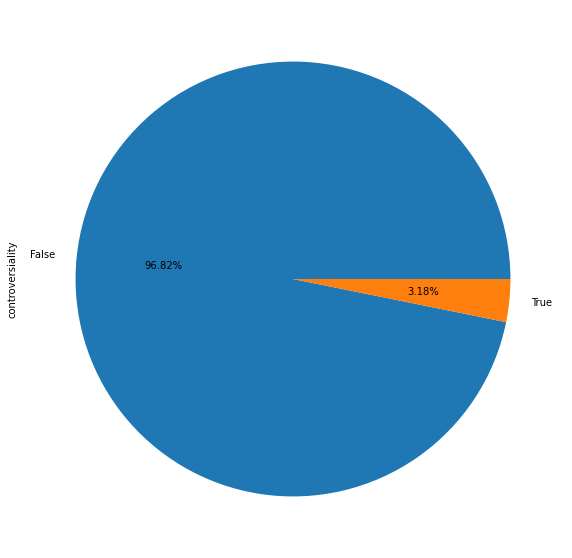

In [16]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["controversiality"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["controversiality"].value_counts())

# Stickied

In [17]:
df['stickied'] = df['stickied'].replace(0,False)
df['stickied'] = df['stickied'].replace(1,True)

False    725733
True          2
Name: stickied, dtype: int64


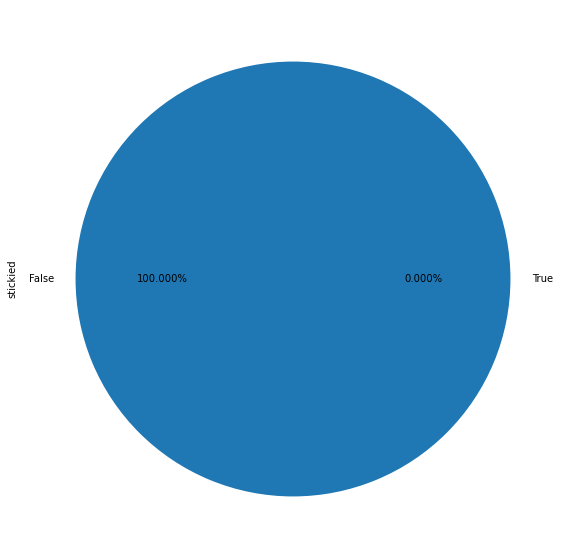

In [18]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["stickied"].value_counts().plot(kind='pie', autopct='%1.3f%%')
print(df["stickied"].value_counts())

# Link_id

t3_qmkx9x    1111
t3_r150dl    1050
t3_qr0iad     949
t3_qy94fj     937
t3_qq45qb     903
             ... 
t3_r25xuz       1
t3_qtjdzg       1
t3_r25unw       1
t3_qtj91q       1
t3_r60x6t       1
Name: link_id, Length: 52456, dtype: int64


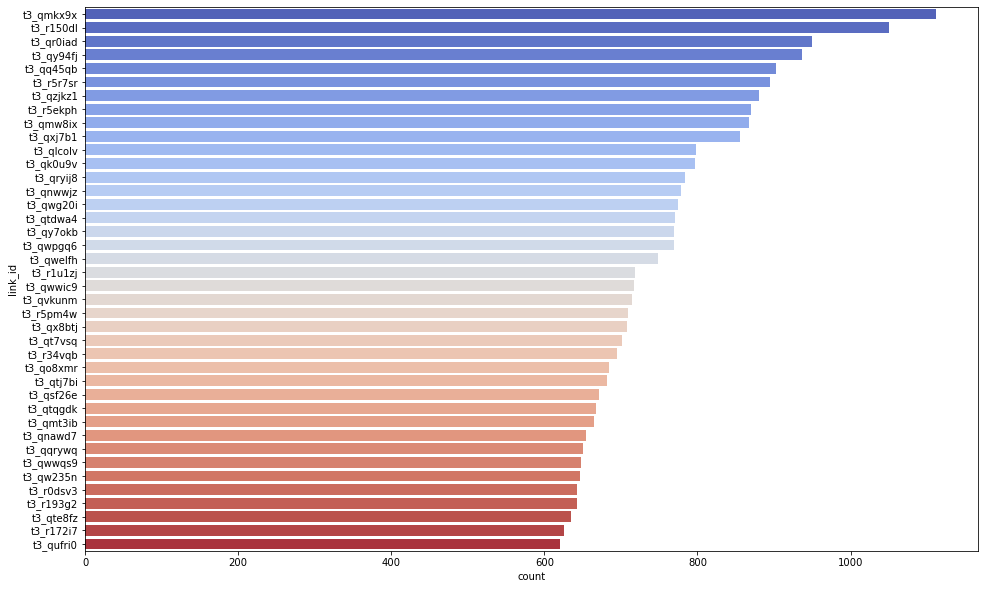

In [19]:
fig = plt.figure(figsize=(16,10))
sns.countplot(y="link_id", data=df, palette="coolwarm",
              order=df.link_id.value_counts().iloc[:40].index)
print(df["link_id"].value_counts())

In [20]:
total_submissions = df['link_id'].nunique()

# Das Ergebnis anzeigen
print(f'Gesamtanzahl der Einreichungen (Submissions): {total_submissions}')

Gesamtanzahl der Einreichungen (Submissions): 52456


# Author

<AxesSubplot:xlabel='count', ylabel='author'>

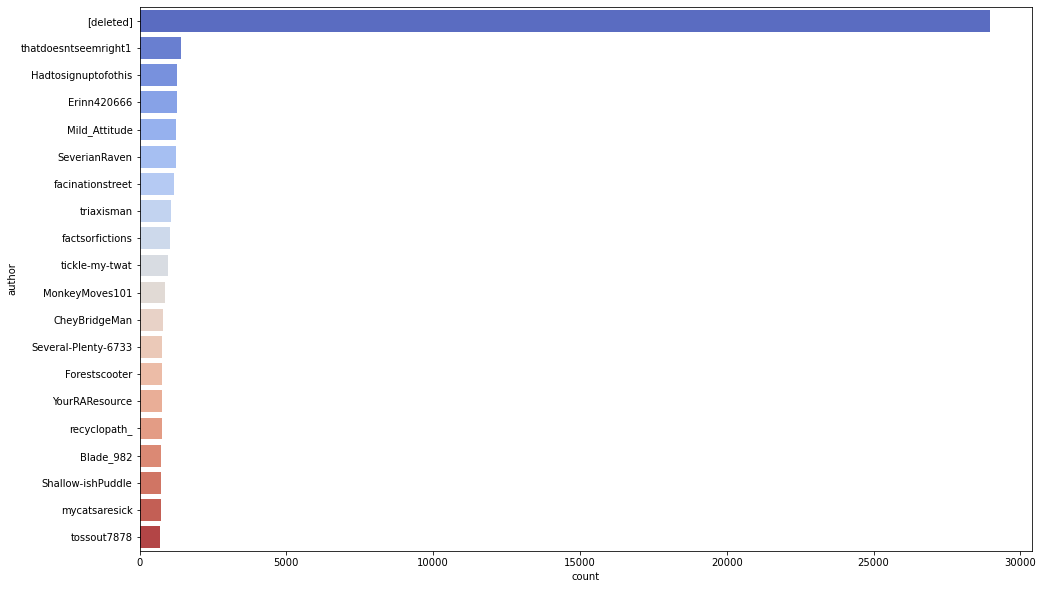

In [21]:
fig = plt.figure(figsize=(16,10))
sns.countplot(y="author", data=df, palette="coolwarm",
              order=df.author.value_counts().iloc[:20].index)

# Ohne Deleted

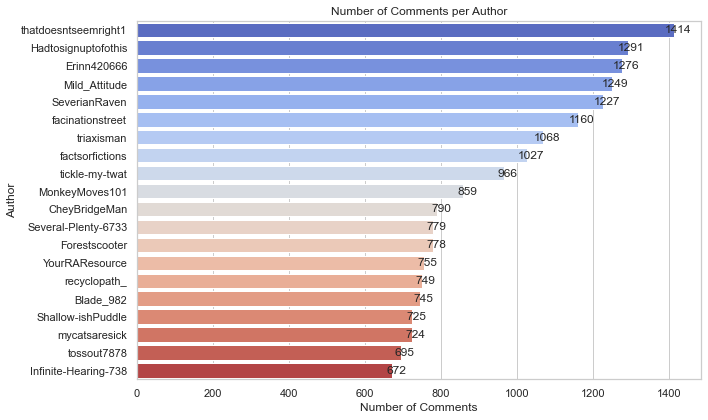

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits ein DataFrame mit einer "author" Spalte (z.B., df)

# Top 5 Autoren nach Anzahl der Kommentare auswählen und "[deleted]" entfernen
top_authors = df[df['author'] != '[deleted]']['author'].value_counts().iloc[:20].index

# Sub-Datenframe nur mit den Top-Autoren erstellen (ohne "[deleted]")
top_comments = df[(df['author'].isin(top_authors)) & (df['author'] != '[deleted]')]

# Countplot erstellen
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plot = sns.countplot(y="author", data=top_comments, palette="coolwarm", order=top_authors)

# Anzahl der Kommentare über den Balken anzeigen
for p in plot.patches:
    plot.annotate(format(p.get_width(), '.0f'),
                  (p.get_width() + 10, p.get_y() + p.get_height() / 2),
                  ha='center', va='center')

plt.xlabel("Number of Comments")
plt.ylabel("Author")
plt.title("Number of Comments per Author")

# Achsenbeschriftungen nicht abschneiden
plt.tight_layout()
plt.show()

In [23]:
total_author = df['author'].nunique()-1

# Das Ergebnis anzeigen
print(f'Gesamtanzahl der Authoren: {total_author}')

Gesamtanzahl der Authoren: 120446


In [24]:
# Group by "link_id" and count the number of comments per submission
submission_comment_counts = df.groupby('link_id')['body'].count()

# Calculate the average number of comments per submission
average_comments_per_submission = submission_comment_counts.mean()

# Display the result
print(f'Average number of comments per submission: {average_comments_per_submission:.2f}')

Average number of comments per submission: 13.84


In [25]:
author_comment_counts = df.groupby('author')['body'].count()

# Calculate the average number of comments per author
average_comments_per_author = author_comment_counts.mean()

# Display the result
print(f'Average number of comments per author: {average_comments_per_author:.2f}')

Average number of comments per author: 6.03


# Hours

([<matplotlib.axis.XTick at 0x7f8431f05880>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

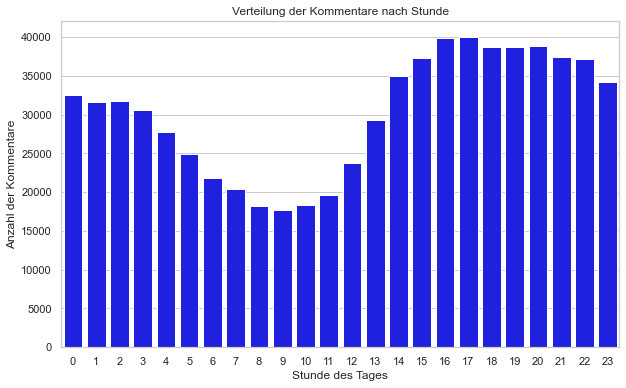

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits den DataFrame "comments_new" geladen

# Extrahiere die Stunden aus der Spalte "created_utc"
#df['created_hour'] = pd.to_datetime(df['created_utc'], unit='s').dt.hour

# Erstelle das Countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='created_hour', color='blue')

plt.title('Verteilung der Kommentare nach Stunde')
plt.xlabel('Stunde des Tages')
plt.ylabel('Anzahl der Kommentare')
plt.xticks(range(24))  # Setze x-Achse auf Stunden

# Days

Text(0, 0.5, 'Anzahl der Kommentare')

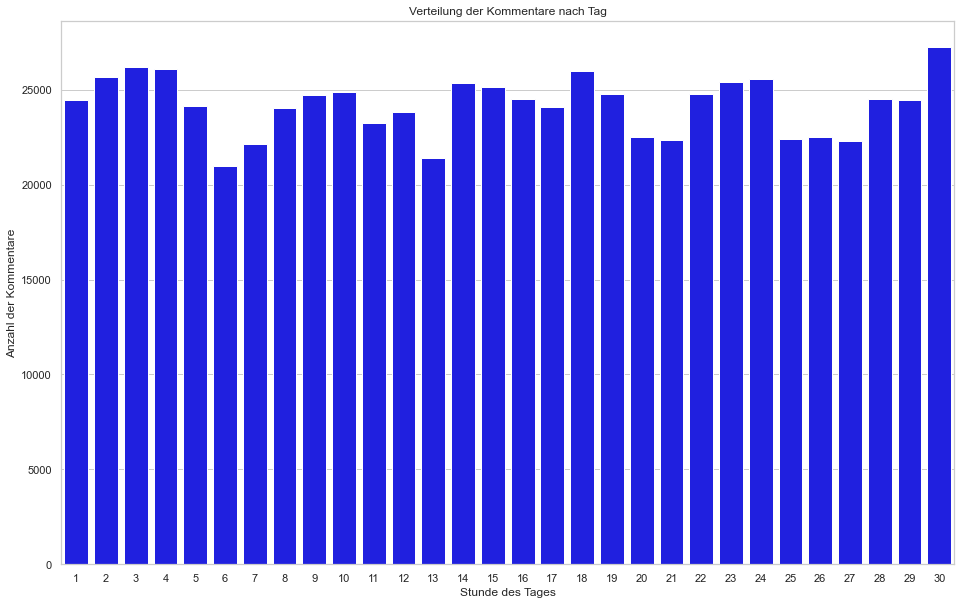

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits den DataFrame "comments_new" geladen

# Extrahiere die Stunden aus der Spalte "created_utc"

# Erstelle das Countplot
fig = plt.figure(figsize=(16,10))
sns.countplot(data=df, x='created_day', color='blue')

plt.title('Verteilung der Kommentare nach Tag')
plt.xlabel('Stunde des Tages')
plt.ylabel('Anzahl der Kommentare')

# Gilded

0    725449
1       276
2         9
4         1
Name: gilded, dtype: int64


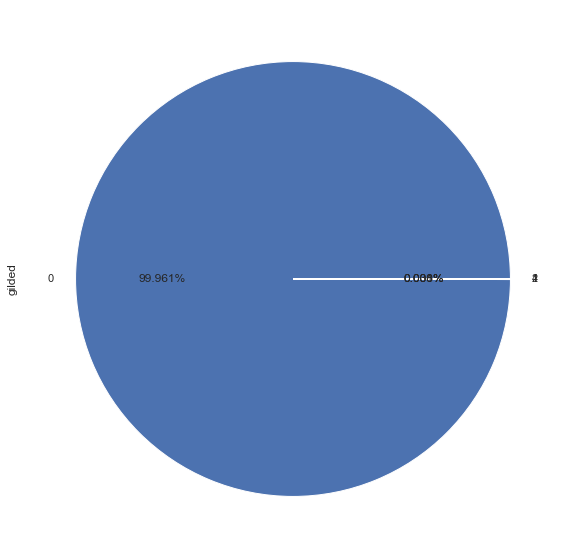

In [29]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["gilded"].value_counts().plot(kind='pie', autopct='%1.3f%%')
print(df["gilded"].value_counts())

# Distinguished

In [30]:
df["distinguished"] = df["distinguished"].replace(0,"0")
df["distinguished"] = df["distinguished"].replace("0",False)

False        725724
moderator        11
Name: distinguished, dtype: int64


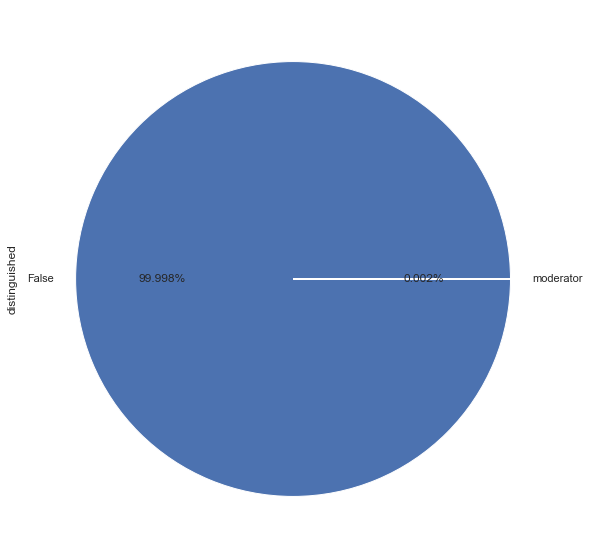

In [31]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["distinguished"].value_counts().plot(kind='pie', autopct='%1.3f%%')
print(df["distinguished"].value_counts())

# Edited

In [32]:
df['edited'] = df['edited'].replace(0,"0")
df['edited'] = df['edited'].replace(1,"1")
df['edited'] = df['edited'].replace("0",False)
df['edited'] = df['edited'].replace("1",True)

False    708829
True      16906
Name: edited, dtype: int64


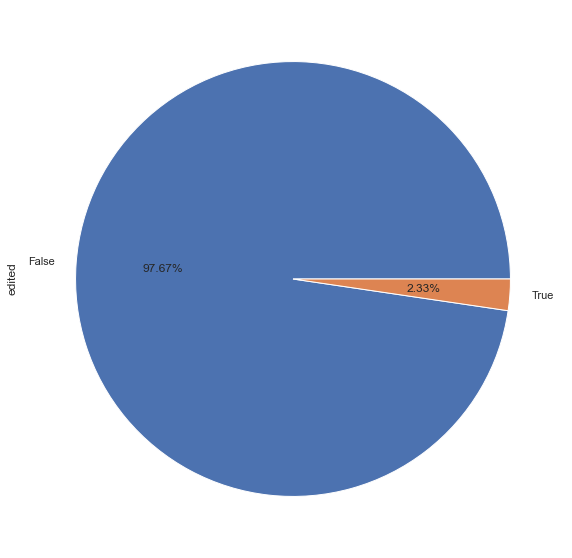

In [33]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["edited"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["edited"].value_counts())

# Score

In [34]:
df["score"].mean()

12.12151680709901

In [35]:
top_10_scores = df.nlargest(10, 'score')
top_10_scores

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year,clean_text,comment_len
214936,TMGThro,0,You've noticed the lighting in your bathroom i...,False,2021-11-09 21:01:07,False,False,0,hjzf73d,t3_qqd1yo,t3_qqd1yo,10177,False,21,9,2021,You ve noticed the lighting in your bathroom i...,61
492339,Blade_982,0,He strung her along for 9 years and is marryin...,False,2021-11-21 08:55:03,False,False,0,hlhn9bi,t3_qyqipa,t3_qyqipa,9810,False,8,21,2021,He strung her along for years and is marrying ...,60
623398,mawkish,0,Way above reddit's paygrade. Speak to a profes...,False,2021-11-26 20:15:39,False,False,0,hm6x9kf,t3_r2vfum,t3_r2vfum,8489,False,20,26,2021,Way above reddit s paygrade . Speak to a profe...,14
133489,Elderberry-Girl,0,I think it doesn't sound like she did anything...,False,2021-11-06 09:59:52,False,True,1,hjj6wod,t3_qnwwjz,t3_qnwwjz,8107,False,9,6,2021,I think it doesn t sound like she did anything...,75
385483,throwaway28236,0,So he wants nothing to do with his flesh and b...,False,2021-11-16 22:34:31,False,False,1,hkwv57e,t3_qvieee,t3_qvieee,6293,False,22,16,2021,So he wants nothing to do with his flesh and b...,134
396881,PrettyPinkPeoni3s,0,Find a new boyfriend. Someone that thinks a ra...,False,2021-11-17 11:49:54,False,False,0,hkz70rn,t3_qvxjir,t3_qvxjir,6193,False,11,17,2021,Find a new boyfriend . Someone that thinks a r...,22
413813,ModernWarfareScrub,0,I've been incredibly fucked up on drugs and al...,False,2021-11-18 02:32:59,False,False,2,hl2kdsw,t3_qwelfh,t3_qwelfh,6162,False,2,18,2021,I ve been incredibly fucked up on drugs and al...,44
451928,kawaiijudochop,0,Break up with him,False,2021-11-19 16:17:14,False,False,0,hl9q1lf,t3_qxjkh9,t3_qxjkh9,5921,False,16,19,2021,Break up with him,4
49241,Party_Teacher6901,0,"Oh yeah, they couldn't have done much...just a...",False,2021-11-02 23:16:35,False,False,0,hj2rpeh,t3_qlg2c3,t3_qlg2c3,5809,False,23,2,2021,Oh yeah they couldn t have done much ... just ...,25
644210,xeevx,0,This is above our pay grade. THERAPY.,False,2021-11-27 18:48:29,False,False,1,hmaxsgn,t3_r3jybl,t3_r3jybl,5782,False,18,27,2021,This is above our pay grade . THERAPY .,9


In [36]:
bottom_10_scores = df.nsmallest(10, 'score')
bottom_10_scores

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year,clean_text,comment_len
719448,throwRA088775,0,If she was to break up with me and find someon...,False,2021-11-30 18:42:35,False,False,0,hmp09u2,t3_r5twoa,t1_hmozk0q,-1114,False,18,30,2021,If she was to break up with me and find someon...,28
33895,X_SuperTerrorizer_X,0,You sound like a good friend that's genuinely...,False,2021-11-02 11:28:03,False,False,0,hizyxyd,t3_qky559,t1_hizf345,-787,False,11,2,2021,You sound like a good friend that s genuinely ...,18
471496,psycologina,0,BecauSe I take marriage very seriously and I h...,False,2021-11-20 11:08:18,False,False,0,hldgwfd,t3_qy37wf,t1_hldghpk,-761,False,11,20,2021,BecauSe I take marriage very seriously and I h...,24
319017,themanasdaskid,0,So you’re telling women need to deal with thei...,False,2021-11-14 06:32:30,False,False,0,hkk3g0n,t3_qtjmt8,t1_hkk23d3,-736,False,6,14,2021,So you re telling women need to deal with thei...,23
313112,ThrowRAresentment32,0,I didn't abandon them. I didn't leave my famil...,False,2021-11-14 00:56:59,False,False,0,hkiyi3e,t3_qtdwa4,t1_hkixhhd,-663,False,0,14,2021,I didn t abandon them . I didn t leave my fami...,125
412628,pond-dweller,0,I am humiliated because I was mistaken when I ...,False,2021-11-18 01:28:30,False,True,0,hl2bro0,t3_qwc46s,t1_hl1yw5p,-662,False,1,18,2021,I am humiliated because I was mistaken when I ...,71
342756,SocialistLunatic,0,Nah I'm 16 and I would manage this pretty easi...,False,2021-11-15 04:45:29,False,True,0,hkomc2n,t3_qu4zby,t1_hko09i2,-649,False,4,15,2021,Nah I m and I would manage this pretty easily ...,110
222874,Grumpy_Troll,Late 30s Male,"This guy's a huge asshole, but assuming they a...",False,2021-11-10 03:38:48,False,False,0,hk0xw7s,t3_qqi83x,t1_hk0e3p7,-637,False,3,10,2021,This guy s a huge asshole but assuming they ar...,44
605454,Accurate_Mine_9864,0,"embezzlement is a criminal offense here, subje...",False,2021-11-26 00:15:06,False,False,0,hm3hnc9,t3_r27d0i,t1_hm334ru,-618,False,0,26,2021,embezzlement is a criminal offense here subjec...,32
352382,Throwaway154542741,0,Because somehow I had hoped that people change...,False,2021-11-15 16:05:35,False,False,0,hkqe7ex,t3_quja1c,t1_hkqctnu,-610,False,16,15,2021,Because somehow I had hoped that people change...,42


# Score vs hours on comments

<AxesSubplot:xlabel='created_hour', ylabel='score'>

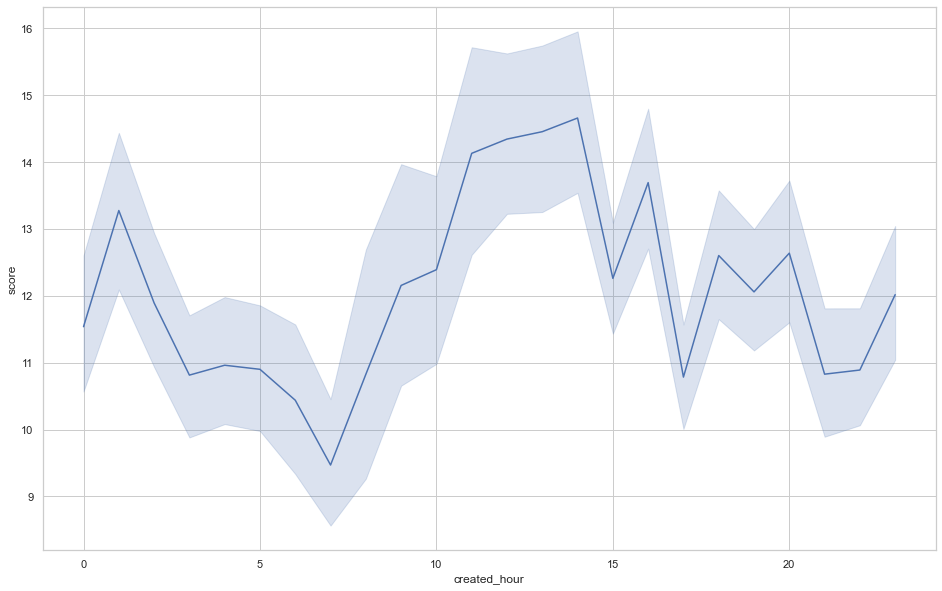

In [37]:
fig = plt.figure(figsize=(16,10))
sns.lineplot(data=df, x="created_hour", y="score")

# Days vs Score on comments

<AxesSubplot:xlabel='created_day', ylabel='score'>

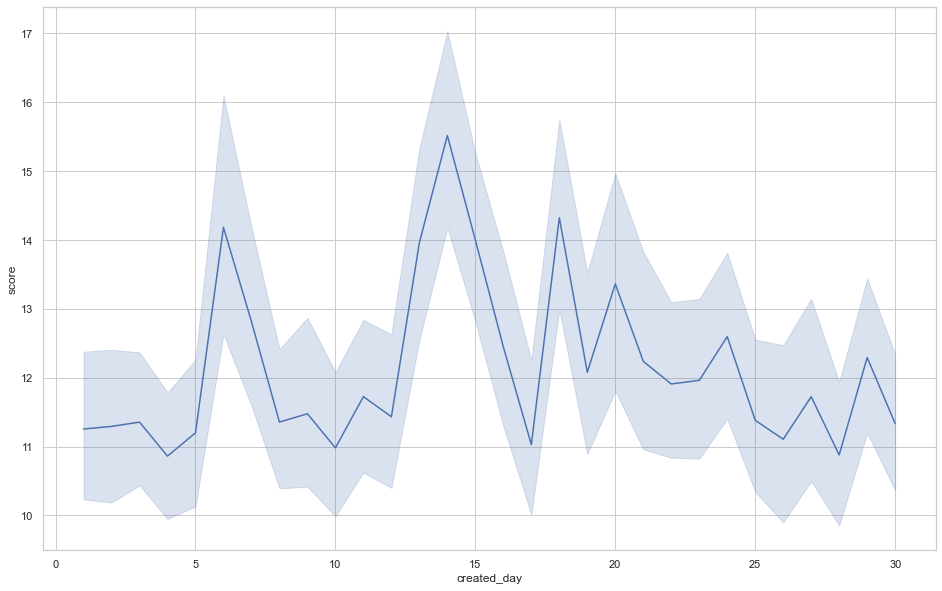

In [38]:
fig = plt.figure(figsize=(16,10))
sns.lineplot(data=df, x="created_day", y="score")

# Which author have the most scores

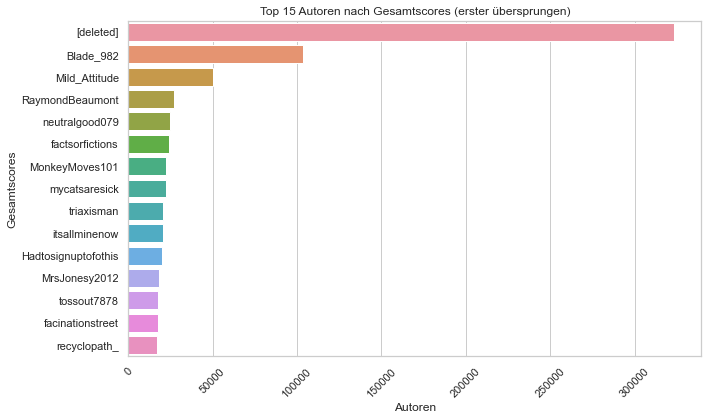

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: merged_df ist dein DataFrame mit den entsprechenden Spalten
# Stellen Sie sicher, dass Sie denselben DataFrame-Namen verwenden

# Autoren nach Gesamtscores gruppieren
author_scores = df.groupby('author')['score'].sum()

# Autoren nach Gesamtscores absteigend sortieren
sorted_authors = author_scores.sort_values(ascending=False)

# Den ersten Autor aus der sortierten Liste entfernen
sorted_authors = sorted_authors.iloc[:15]

# Die Top 15 Autoren auswählen
top_authors = sorted_authors.head(15)

# Plot mit Seaborn erstellen
plt.figure(figsize=(10, 6))
sns.barplot(y=top_authors.index, x=top_authors.values)
plt.title('Top 15 Autoren nach Gesamtscores (erster übersprungen)')
plt.xlabel('Autoren')
plt.ylabel('Gesamtscores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

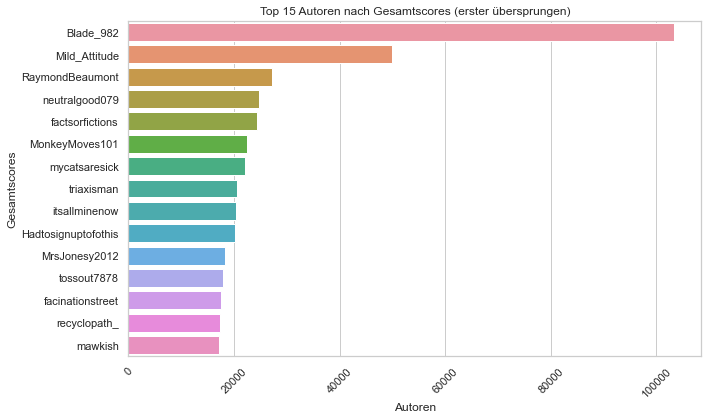

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Autoren nach Gesamtscores gruppieren
author_scores = df.groupby('author')['score'].sum()

# Autoren nach Gesamtscores absteigend sortieren
sorted_authors = author_scores.sort_values(ascending=False)

# Den Autor "[deleted]" aus der sortierten Liste entfernen
sorted_authors = sorted_authors[sorted_authors.index != "[deleted]"]

# Die Top 15 Autoren auswählen
top_authors = sorted_authors.head(15)

# Plot mit Seaborn erstellen
plt.figure(figsize=(10, 6))
sns.barplot(y=top_authors.index, x=top_authors.values)
plt.title('Top 15 Autoren nach Gesamtscores (erster übersprungen)')
plt.xlabel('Autoren')
plt.ylabel('Gesamtscores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [41]:
df.describe()

,gilded,score,created_hour,created_day,created_year,comment_len
count,725735.000000,725735.000000,725735.000000,725735.000000,725735.0,725735.000000
mean,0.000411,12.121517,12.447406,15.488171,2021.0,56.796803
std,0.021255,96.124245,7.205048,8.712608,0.0,67.951378
min,0.000000,-1114.000000,0.000000,1.000000,2021.0,1.000000
25%,0.000000,1.000000,6.000000,8.000000,2021.0,16.000000
50%,0.000000,2.000000,14.000000,16.000000,2021.0,36.000000
75%,0.000000,4.000000,19.000000,23.000000,2021.0,72.000000
max,4.000000,10177.000000,23.000000,30.000000,2021.0,1951.000000


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 725735 entries, 0 to 726302
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   author             725735 non-null  object
 1   author_flair_text  725735 non-null  object
 2   body               725735 non-null  object
 3   controversiality   725735 non-null  bool  
 4   created_utc        725735 non-null  object
 5   distinguished      725735 non-null  object
 6   edited             725735 non-null  bool  
 7   gilded             725735 non-null  int64 
 8   id                 725735 non-null  object
 9   link_id            725735 non-null  object
 10  parent_id          725735 non-null  object
 11  score              725735 non-null  int64 
 12  stickied           725735 non-null  bool  
 13  created_hour       725735 non-null  int64 
 14  created_day        725735 non-null  int64 
 15  created_year       725735 non-null  int64 
 16  clean_text         7

# Save cleaned general data

In [43]:
df.to_csv("relationship_advise_21_comments_EDA_clean.csv",index=False,sep=",")

In [44]:
import pandas as pd
df_new=pd.read_csv("relationship_advise_21_comments_EDA_clean.csv",sep=",")
df_new.info()


/Users/anthonyfernando/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725735 entries, 0 to 725734
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   author             725735 non-null  object
 1   author_flair_text  725735 non-null  object
 2   body               725735 non-null  object
 3   controversiality   725735 non-null  bool  
 4   created_utc        725735 non-null  object
 5   distinguished      725735 non-null  object
 6   edited             725735 non-null  bool  
 7   gilded             725735 non-null  int64 
 8   id                 725735 non-null  object
 9   link_id            725735 non-null  object
 10  parent_id          725735 non-null  object
 11  score              725735 non-null  int64 
 12  stickied           725735 non-null  bool  
 13  created_hour       725735 non-null  int64 
 14  created_day        725735 non-null  int64 
 15  created_year       725735 non-null  int64 
 16  clean_text         7

False    725733
True          2
Name: stickied, dtype: int64


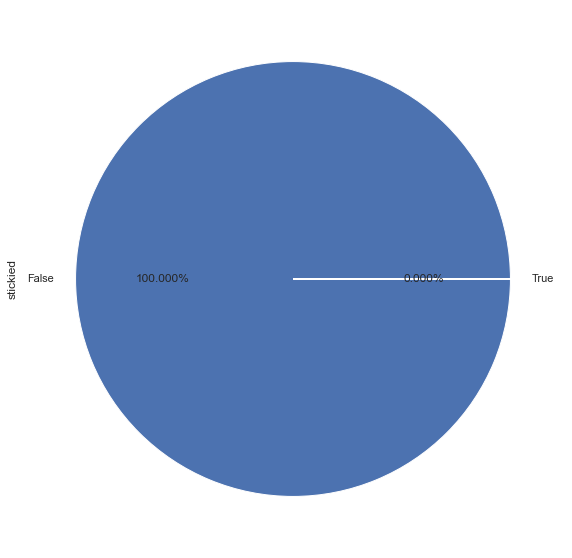

In [45]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df_new["stickied"].value_counts().plot(kind='pie', autopct='%1.3f%%')
print(df_new["stickied"].value_counts())